# KE5105 - Building Electrical Consumption Forecasting

# Extract, Transform and Load Data 2 - Data Exploration

## Summary of Findings on Building SDE-3 Data

* Date/time data is encoded month first (i.e. m/d/y) in 2015-2017 data and day first (i.e. d/m/y) in the 2018 data. This will be included during data transformation.

* The raw power watt meter (PWM) data are cumulative PWM data. To get the half-hourly PWM data, each observation needs to be substracted from the previous. This will be included during data transformation.

* There is a **drop in value** in some raw PWM data after the period of data outage.
	* Before the data outage period in Mar 2017, the values for PWM-SDE3 IC1, PWM-SDE3 IC2 and PWM-SDE3 MCC (AC) are ~10,400,000, ~9,700,000 and 6,400,000 respectively.
	* After the data outage period in Jan 2018, the values for PWM-SDE3 IC1, PWM-SDE3 IC2 and PWM-SDE3 MCC (AC) are ~390,000, ~214,000 and 0.

* There is an unusual amount of **missing data, zero values** in Jun-Jul 2018.

* Observations on the aggregated PWM data : 
	* Reduction in PWM occurs earlier during orientation, reading, exam, vacation periods.
	* Maximum PWM value is lower during orientation, reading, exam, vacation periods.
	* Sat and Sun PWM patterns are different for some periods, e.g. orientation, vacation periods.
	* Public holiday data patterns are similar to weekend patterns.
	* The maximum PWM value is higher in 2018 compared to 2015-2017.
	* The trend after removal of noise shows :
		* a plateau for each semester
		* a valley for each vacation period
		* a mini-valley for each recess week
	* The trend for 2015-2016 and 2016-2017 look similar.
	* The maximum aggregated PWM value appears to trend higher in 2018.




## Load Libraries

In [1]:
%matplotlib inline

import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import myUtilities as myUtils
from pandas.tseries.offsets import DateOffset

pd.options.display.max_columns = 20

## Load Data

In [2]:
# Load the time series data for 1 building (SDE-3).
sde3_list = myUtils.load_data_by_bldg(['SDE-3'], type='raw')
for i in sde3_list[:3]:
    print(i[0], '\n')
    print(i[3].iloc[:5, :], '\n')

SDE-3_May2018.csv 

           Pt_timeStamp PWM-SDE3 IC1 PWM-SDE3 IC2  PWM-SDE3 MCC (AC)  \
0  1/5/2018 12:00:00 AM   847,789.88   525,517.88                0.0   
1  1/5/2018 12:30:00 AM   847,857.44   525,556.69                0.0   
2   1/5/2018 1:00:00 AM   847,920.50   525,595.31                0.0   
3   1/5/2018 1:30:00 AM   847,983.50   525,633.38                0.0   
4   1/5/2018 2:00:00 AM   848,047.50   525,671.50                0.0   

   PWM-CELC IC1 PWM-CELC IC2      PWM-SDE1  PWM-SDE2 SSB  PWM-SDE2 AC  \
0  1,594,258.00   708,561.63  1,170,756.63  3,394,773.50          0.0   
1  1,594,258.00   708,563.88  1,170,760.75  3,394,784.75          0.0   
2  1,594,258.13   708,566.31  1,170,764.75  3,394,795.50          0.0   
3  1,594,258.25   708,568.44  1,170,769.00  3,394,805.50          0.0   
4  1,594,258.38   708,570.63  1,170,773.25  3,394,816.00          0.0   

   PWM-SDE3 Ext PWM-Street Light  BTU-SDE3-Chiller Plant    BTU-SDE3-2  \
0  1,217,990.63         3,246.15  

Note that the date/time is encoded differently for May 2018 (d/m/y) vs Jul 2016 (m/d/y). 

## Explore the date/time field

In [3]:
# Try to convert date/time for May 2018 using default parameters. This does not work.
print(sde3_list[0][0])
print('raw =', sde3_list[0][3].loc[:, 'Pt_timeStamp'][0])
processed_datetime = pd.to_datetime(sde3_list[0][3].loc[:, 'Pt_timeStamp'])
print('processed =', processed_datetime[0])
print('day =', processed_datetime[0].day, 'month = ', processed_datetime[0].month, 'year = ', processed_datetime[0].year)

SDE-3_May2018.csv
raw = 1/5/2018 12:00:00 AM


processed = 2018-01-05 00:00:00
day = 5 month =  1 year =  2018


In [4]:
# Try to convert date/time for May 2018 using infer_datetime_format=True. This does not work.
print(sde3_list[0][0])
print('raw =', sde3_list[0][3].loc[:, 'Pt_timeStamp'][0])
processed_datetime = pd.to_datetime(sde3_list[0][3].loc[:, 'Pt_timeStamp'], infer_datetime_format=True)
print('processed =', processed_datetime[0])
print('day =', processed_datetime[0].day, 'month = ', processed_datetime[0].month, 'year = ', processed_datetime[0].year)

SDE-3_May2018.csv
raw = 1/5/2018 12:00:00 AM


processed = 2018-01-05 00:00:00
day = 5 month =  1 year =  2018


In [5]:
# Try to convert date/time for May 2018 using dayfirst=True. This works!
print(sde3_list[0][0])
print('raw =', sde3_list[0][3].loc[:, 'Pt_timeStamp'][0])
processed_datetime = pd.to_datetime(sde3_list[0][3].loc[:, 'Pt_timeStamp'], dayfirst=True)
print('processed =', processed_datetime[0])
print('day =', processed_datetime[0].day, 'month = ', processed_datetime[0].month, 'year = ', processed_datetime[0].year)

SDE-3_May2018.csv
raw = 1/5/2018 12:00:00 AM


processed = 2018-05-01 00:00:00
day = 1 month =  5 year =  2018


In [6]:
# Try to convert date/time for Jul 2016 using default parameters. This works.
print(sde3_list[1][0])
print('raw =', sde3_list[1][3].loc[:, 'Pt_timeStamp'][0])
processed_datetime = pd.to_datetime(sde3_list[1][3].loc[:, 'Pt_timeStamp'])
print('processed =', processed_datetime[0])
print('day =', processed_datetime[0].day, 'month = ', processed_datetime[0].month, 'year = ', processed_datetime[0].year)

SDE-3_Jul2016.csv
raw = 7/1/2016 12:00:00 AM


processed = 2016-07-01 00:00:00
day = 1 month =  7 year =  2016


It looks like we have to convert the encoded date/time using different conversion functions. Check through all the files to determine their date/time encoding used.

In [7]:
# Iterate through all the files to check their date/time encoding.
mylist = []
for i in sde3_list:
    if not i[3].empty:
        if i[2] != 1:
            # Check the 1st datetime value.
            mylist.append([i[1], i[2], int(i[3].iloc[0, 0].split('/')[1]) == i[2]])
        else:
            # For Jan, need to check datetime value for 2nd day i.e. 48 x 2 = 96.
            mylist.append([i[1], i[2], int(i[3].iloc[96, 0].split('/')[1]) == i[2]])

# The above check does not work properly for other building datasets, The correct check is implemented in is_day_first().
            
# Convert list to dataframe. 
datetime_encoding_df = pd.DataFrame(mylist, columns=['year', 'month', 'dayfirst'])

# Reindex the dataframe using the year/month, add missing values for any period with no files. 
datetime_encoding_df['date'] = pd.to_datetime(datetime_encoding_df['year'].astype(str) + '/' + datetime_encoding_df['month'].astype(str))
datetime_encoding_df['date'] = datetime_encoding_df['date'].dt.to_period('M')
datetime_encoding_df.set_index('date', inplace=True)
all_dates = pd.date_range('5/2015', '8/2018', freq='M').to_period('M')
datetime_encoding_df = datetime_encoding_df.reindex(all_dates)
datetime_encoding_df.sort_index(inplace=True)
#datetime_encoding_df = datetime_encoding_df.fillna(-1)

# Convert boolean to numeric for plotting.
datetime_encoding_df['dayfirst'] = datetime_encoding_df['dayfirst'].astype('float')
datetime_encoding_df.head()

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>year</th>
      <th>month</th>
      <th>dayfirst</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>2015-05</th>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>2015-06</th>
      <td>2015.0</td>
      <td>6.0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>2015-07</th>
      <td>2015.0</td>
      <td>7.0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>2015-08</th>
      <td>2015.0</td>
      <td>8.0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>2015-09</th>
      <td>2015.0</td>
      <td>9.0</td>
      <td>0.0</td>
    </tr>
  </tbody>
</table>
</div>

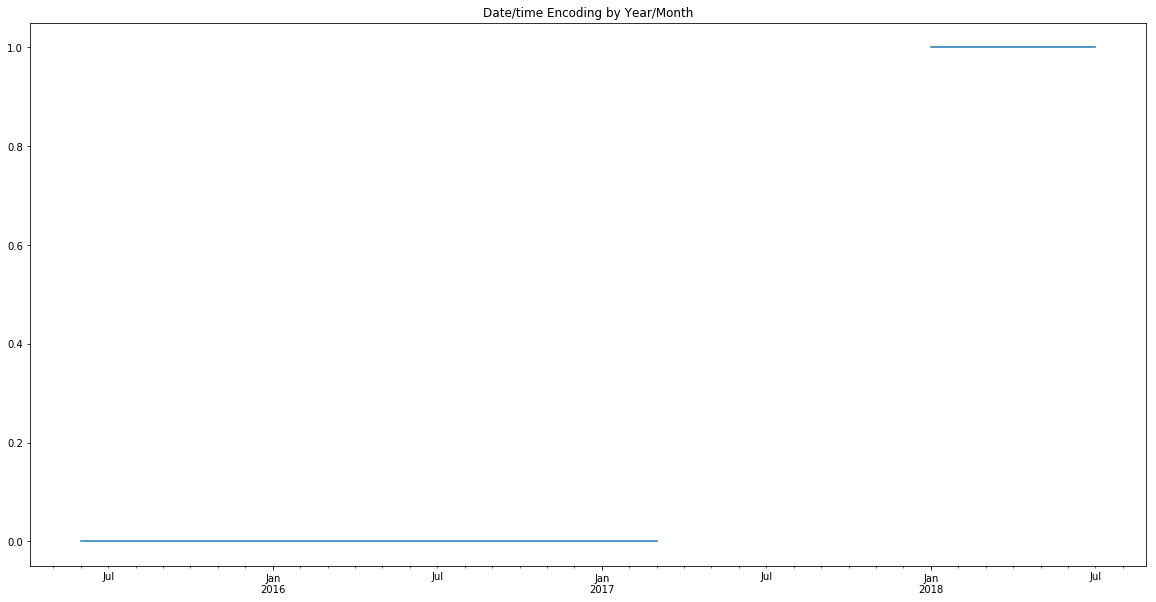

In [8]:
datetime_encoding_df.loc[:, 'dayfirst'].plot(figsize=(20, 10), title='Date/time Encoding by Year/Month')

In the above plot, the legend is :
* missing : no files
* 0       : month first i.e. m/d/y
* 1       : day first i.e. d/m/y

The files are encoded **month first** for the period before the data outage and **day first** after.

## Explore the other data fields

In [9]:
sde3_list[0][3].columns

Index(['Pt_timeStamp', 'PWM-SDE3 IC1', 'PWM-SDE3 IC2', 'PWM-SDE3 MCC (AC)',
       'PWM-CELC IC1', 'PWM-CELC IC2', 'PWM-SDE1', 'PWM-SDE2 SSB',
       'PWM-SDE2 AC', 'PWM-SDE3 Ext', 'PWM-Street Light',
       'BTU-SDE3-Chiller Plant', 'BTU-SDE3-2', 'BTU-SDE3 1&2'],
      dtype='object')

In [10]:
sde3_list[0][3].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1487 entries, 0 to 1486
Data columns (total 14 columns):
Pt_timeStamp              1487 non-null object
PWM-SDE3 IC1              1450 non-null object
PWM-SDE3 IC2              1450 non-null object
PWM-SDE3 MCC (AC)         1450 non-null float64
PWM-CELC IC1              1487 non-null object
PWM-CELC IC2              1487 non-null object
PWM-SDE1                  1483 non-null object
PWM-SDE2 SSB              1486 non-null object
PWM-SDE2 AC               1486 non-null float64
PWM-SDE3 Ext              1483 non-null object
PWM-Street Light          1450 non-null object
BTU-SDE3-Chiller Plant    1450 non-null float64
BTU-SDE3-2                1450 non-null object
BTU-SDE3 1&2              1450 non-null object
dtypes: float64(3), object(11)
memory usage: 162.7+ KB


We need to convert the objects to a numeric type e.g. float for processing.

In [11]:
# There is a mixture of strings and floats.
sde3_list[0][3].loc[:, 'PWM-SDE3 IC1'].apply(lambda x: type(x)).unique()

array([<class 'str'>, <class 'float'>], dtype=object)

In [12]:
# There are commas in the string. These need to be removed before conversion to a numeric type.
sde3_list[0][3].loc[:, 'PWM-SDE3 IC1'].head()

0    847,789.88
1    847,857.44
2    847,920.50
3    847,983.50
4    848,047.50
Name: PWM-SDE3 IC1, dtype: object

## Convert the time series data for SDE-3.

In [13]:
# Convert all to string to remove the commas to allow conversion to float.
sde3_list[0][3]['PWM-SDE3 IC1'].astype('str').apply(lambda x: x.replace(',', '')).astype('float').head(20)

0     847789.88
1     847857.44
2     847920.50
3     847983.50
4     848047.50
5     848110.38
6     848173.88
7     848237.81
8     848300.94
9     848364.25
10    848427.50
11    848491.06
12    848554.75
13    848619.25
14    848681.81
15    848741.56
16    848801.81
17    848864.38
18    848927.31
19    848991.88
Name: PWM-SDE3 IC1, dtype: float64

In [14]:
# Convert the date/time for all the dataframes in the list.
for i in sde3_list:
    if not i[3].empty:        
        res, unclear = myUtils.is_day_first(i[0], i[3])
        if unclear:
             myUtils.write_msg_log(i[0] + 'date format unclear')
        if res:
            i[3].loc[:, 'Pt_timeStamp'] = pd.to_datetime(i[3].loc[:, 'Pt_timeStamp'], dayfirst=True)
        else:
            i[3].loc[:, 'Pt_timeStamp'] = pd.to_datetime(i[3].loc[:, 'Pt_timeStamp'])

In [15]:
# Convert the strings to floats for all the dataframes in the list.
for i in sde3_list:
    if not i[3].empty:
        for j in i[3].iloc[:, 1:].columns:
            i[3][j] = i[3][j].astype('str').apply(lambda x: x.replace(',', '')).astype('float')

In [16]:
# Concatenate the list of dataframes into 1 single dataframe.
df_list = []
for i in sde3_list:
    df_list.append(i[3])
sde3_df = pd.concat(df_list)

In [17]:
# The number of data columns (14) after concatenating all the csv files is the same as for the first csv file sampled earlier. The concatenation is successful.
sde3_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40460 entries, 0 to 1387
Data columns (total 14 columns):
Pt_timeStamp              40460 non-null datetime64[ns]
PWM-SDE3 IC1              39779 non-null float64
PWM-SDE3 IC2              39779 non-null float64
PWM-SDE3 MCC (AC)         39779 non-null float64
PWM-CELC IC1              39519 non-null float64
PWM-CELC IC2              39519 non-null float64
PWM-SDE1                  40401 non-null float64
PWM-SDE2 SSB              40416 non-null float64
PWM-SDE2 AC               40416 non-null float64
PWM-SDE3 Ext              40401 non-null float64
PWM-Street Light          39779 non-null float64
BTU-SDE3-Chiller Plant    39586 non-null float64
BTU-SDE3-2                39586 non-null float64
BTU-SDE3 1&2              39587 non-null float64
dtypes: datetime64[ns](1), float64(13)
memory usage: 4.6 MB


In [18]:
# Reindex the dataframe using the year/month/day/time, add missing values for any period with no files. 
sde3_df.set_index('Pt_timeStamp', inplace=True)
all_dates = pd.date_range('5/2015', '8/2018', freq='30min')
sde3_df = sde3_df.reindex(all_dates)
sde3_df.sort_index(inplace=True)

In [19]:
# These are the missing values out of the 40460 observations in the time series data. There could also be missing observations i.e. no indexed row. We will look into this later.
sde3_df.isnull().sum()

PWM-SDE3 IC1              17247
PWM-SDE3 IC2              17247
PWM-SDE3 MCC (AC)         17247
PWM-CELC IC1              17508
PWM-CELC IC2              17508
PWM-SDE1                  16631
PWM-SDE2 SSB              16613
PWM-SDE2 AC               16613
PWM-SDE3 Ext              16631
PWM-Street Light          17247
BTU-SDE3-Chiller Plant    17440
BTU-SDE3-2                17440
BTU-SDE3 1&2              17439
dtype: int64

In [20]:
# These are the zero values in the data.
sde3_df.apply(lambda x: x.eq(0)).sum()

PWM-SDE3 IC1                702
PWM-SDE3 IC2                702
PWM-SDE3 MCC (AC)          9524
PWM-CELC IC1                  4
PWM-CELC IC2                  4
PWM-SDE1                   3751
PWM-SDE2 SSB                  0
PWM-SDE2 AC               10161
PWM-SDE3 Ext                  0
PWM-Street Light            702
BTU-SDE3-Chiller Plant     9524
BTU-SDE3-2                    0
BTU-SDE3 1&2                  0
dtype: int64

In [21]:
sde3_PWM_columns = []
for i in sde3_df.columns:
    if 'PWM' in i:
        sde3_PWM_columns.append(i)
sde3_PWM_columns

['PWM-SDE3 IC1',
 'PWM-SDE3 IC2',
 'PWM-SDE3 MCC (AC)',
 'PWM-CELC IC1',
 'PWM-CELC IC2',
 'PWM-SDE1',
 'PWM-SDE2 SSB',
 'PWM-SDE2 AC',
 'PWM-SDE3 Ext',
 'PWM-Street Light']

## Plots of PWM from Jun 2015 to 2018 Jul

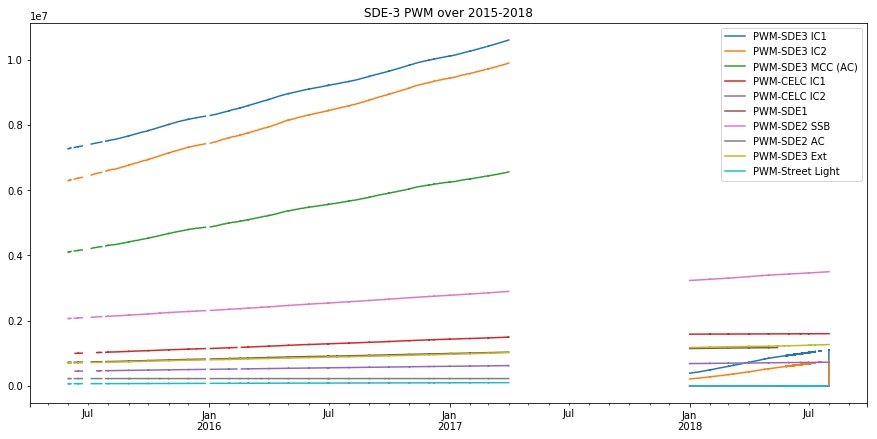

In [22]:
sde3_df.loc[:, sde3_PWM_columns].plot(figsize=(15, 7), title='SDE-3 PWM over 2015-2018')

Looking at the csv files :
* For Mar 2017, the values for PWM-SDE3 IC1, PWM-SDE3 IC2 and PWM-SDE3 MCC (AC) are ~10,400,000, ~9,700,000 and 6,400,000 respectively.
* For Jan 2018, the values for PWM-SDE3 IC1, PWM-SDE3 IC2 and PWM-SDE3 MCC (AC) are ~390,000, ~214,000 and 0.

There is a **drop in value** in the readings.


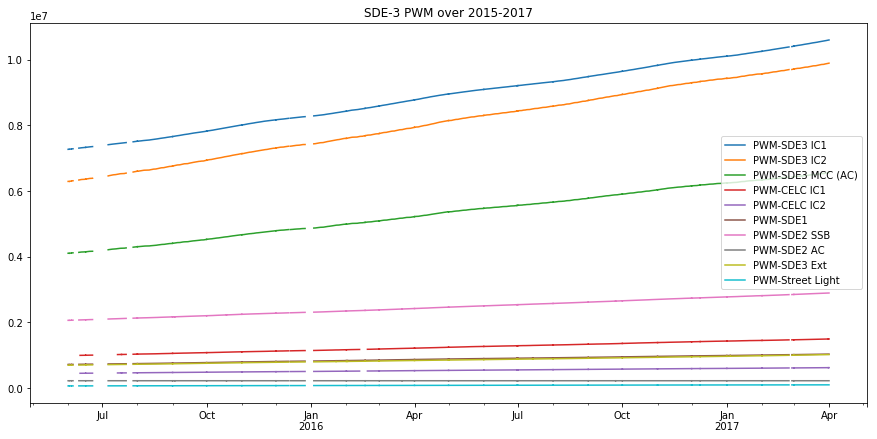

In [23]:
sde3_df.loc['2015-05-01 00H':'2017-05-01 00H', sde3_PWM_columns].plot(figsize=(15, 7), title='SDE-3 PWM over 2015-2017')

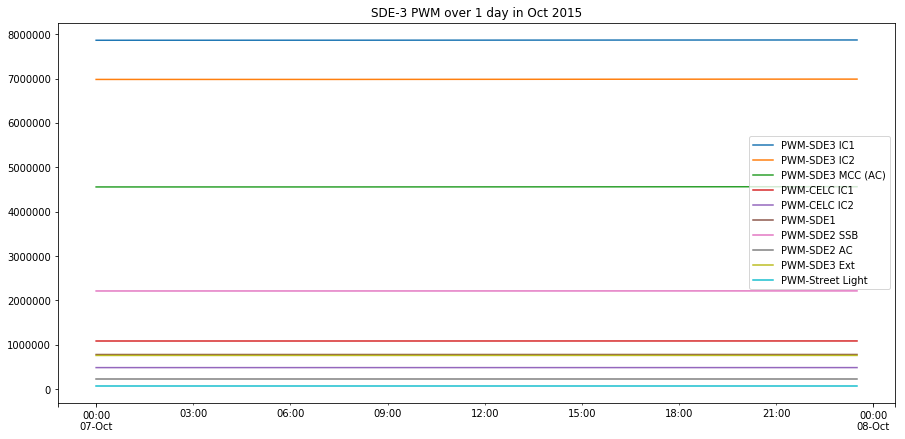

In [24]:
# Explore 1 day (7 Oct) in period before the data outage.
sde3_df.loc['2015-10-07 00H':'2015-10-07 23H', sde3_PWM_columns].plot(figsize=(15, 7), title='SDE-3 PWM over 1 day in Oct 2015')

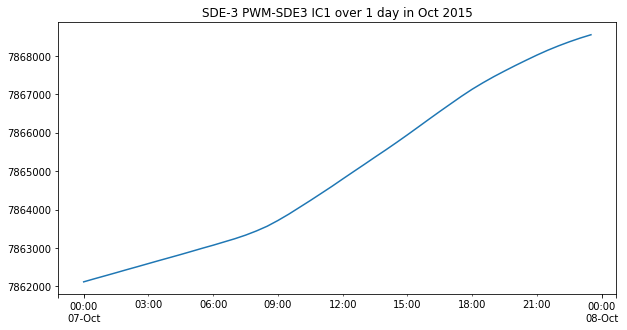

In [25]:
# Explore 1 reading (PWM-SDE3 IC1). 
sde3_df.loc['2015-10-07 00H':'2015-10-07 23H', 'PWM-SDE3 IC1'].plot(figsize=(10, 5), title='SDE-3 PWM-SDE3 IC1 over 1 day in Oct 2015')

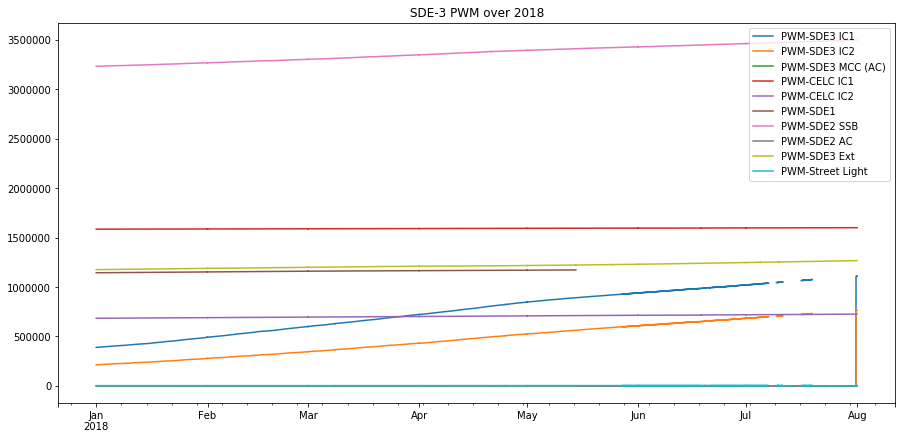

In [26]:
sde3_df.loc['2018-01-01 00H':'2018-08-01 23H', sde3_PWM_columns].plot(figsize=(15, 7), title='SDE-3 PWM over 2018')

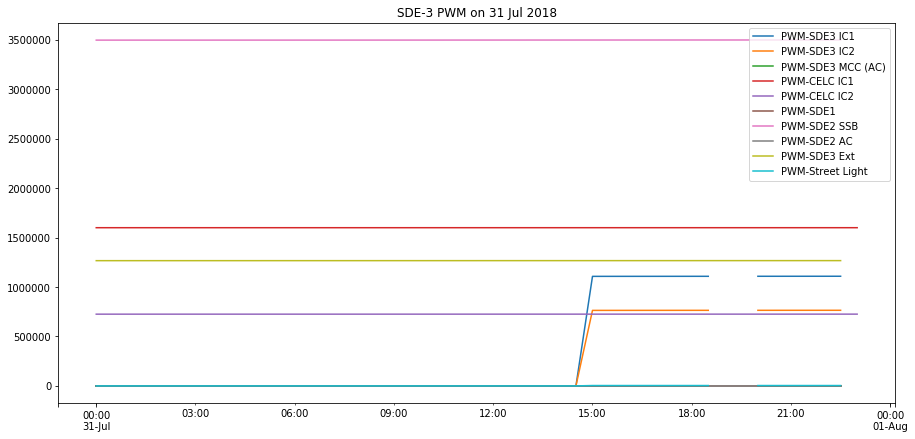

In [27]:
# Explore a day in Jul (31 Jul) when there appears to be missing data.
sde3_df.loc['2018-07-31 00H':'2018-08-01 23H', sde3_PWM_columns].plot(figsize=(15, 7), title='SDE-3 PWM on 31 Jul 2018')

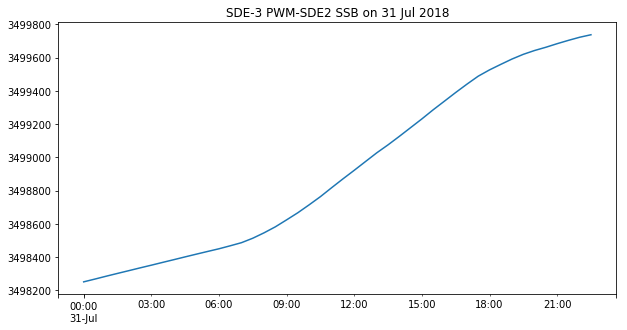

In [28]:
# Explore 1 reading (PWM-SDE2 SSB). 
sde3_df.loc['2018-07-31 00H':'2018-08-01 23H', 'PWM-SDE2 SSB'].plot(figsize=(10, 5), title='SDE-3 PWM-SDE2 SSB on 31 Jul 2018')

The PWM data are **cumulative meter readings**. To get the actual half-hourly meter readings, subtract the current PWM value by the previous value.

## Calculate the Actual Half-hour PWM Values

In [29]:
sde3_df['PWM-SDE3 IC1'][5200:5210]

2015-08-17 08:00:00    7584466.0
2015-08-17 08:30:00    7584584.5
2015-08-17 09:00:00    7584730.0
2015-08-17 09:30:00    7584886.0
2015-08-17 10:00:00    7585045.0
2015-08-17 10:30:00    7585210.0
2015-08-17 11:00:00    7585378.5
2015-08-17 11:30:00    7585550.5
2015-08-17 12:00:00    7585723.5
2015-08-17 12:30:00    7585898.5
Freq: 30T, Name: PWM-SDE3 IC1, dtype: float64

In [30]:
sde3_df['PWM-SDE3 IC1'].diff()[5200:5210]

2015-08-17 08:00:00     99.5
2015-08-17 08:30:00    118.5
2015-08-17 09:00:00    145.5
2015-08-17 09:30:00    156.0
2015-08-17 10:00:00    159.0
2015-08-17 10:30:00    165.0
2015-08-17 11:00:00    168.5
2015-08-17 11:30:00    172.0
2015-08-17 12:00:00    173.0
2015-08-17 12:30:00    175.0
Freq: 30T, Name: PWM-SDE3 IC1, dtype: float64

In [31]:
# Calculate the difference for each column of the data frame,
for i in sde3_df.columns:
    sde3_df[i + '_30min_avg'] = sde3_df[i].diff()

In [32]:
sde3_df.loc[:, sde3_df.columns.str.contains('30min')].iloc[5200:5210, :5]

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>PWM-SDE3 IC1_30min_avg</th>
      <th>PWM-SDE3 IC2_30min_avg</th>
      <th>PWM-SDE3 MCC (AC)_30min_avg</th>
      <th>PWM-CELC IC1_30min_avg</th>
      <th>PWM-CELC IC2_30min_avg</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>2015-08-17 08:00:00</th>
      <td>99.5</td>
      <td>193.0</td>
      <td>127.0</td>
      <td>30.31</td>
      <td>6.40</td>
    </tr>
    <tr>
      <th>2015-08-17 08:30:00</th>
      <td>118.5</td>
      <td>324.5</td>
      <td>216.0</td>
      <td>61.88</td>
      <td>7.66</td>
    </tr>
    <tr>
      <th>2015-08-17 09:00:00</th>
      <td>145.5</td>
      <td>351.5</td>
      <td>214.0</td>
      <td>92.93</td>
      <td>11.34</td>
    </tr>
    <tr>
      <th>2015-08-17 09:30:00</th>
      <td>156.0</td>
      <td>323.0</td>
      <td>214.0</td>
      <td>62.82</td>
      <td>12.41</td>
    </tr>
    <tr>
      <th>2015-08-17 10:00:00</th>
      <td>159.0</td>
      <td>324.0</td>
      <td>215.0</td>
      <td>66.43</td>
      <td>12.69</td>
    </tr>
    <tr>
      <th>2015-08-17 10:30:00</th>
      <td>165.0</td>
      <td>328.5</td>
      <td>216.0</td>
      <td>67.63</td>
      <td>12.65</td>
    </tr>
    <tr>
      <th>2015-08-17 11:00:00</th>
      <td>168.5</td>
      <td>319.0</td>
      <td>215.0</td>
      <td>58.62</td>
      <td>13.22</td>
    </tr>
    <tr>
      <th>2015-08-17 11:30:00</th>
      <td>172.0</td>
      <td>299.5</td>
      <td>210.0</td>
      <td>46.38</td>
      <td>13.44</td>
    </tr>
    <tr>
      <th>2015-08-17 12:00:00</th>
      <td>173.0</td>
      <td>294.5</td>
      <td>203.5</td>
      <td>49.12</td>
      <td>12.94</td>
    </tr>
    <tr>
      <th>2015-08-17 12:30:00</th>
      <td>175.0</td>
      <td>302.0</td>
      <td>209.5</td>
      <td>49.00</td>
      <td>13.06</td>
    </tr>
  </tbody>
</table>
</div>

In [33]:
nrows = len(sde3_df.loc[:, sde3_df.columns.str.contains('30min')])
sde3_df.loc[:, sde3_df.columns.str.contains('30min')].iloc[nrows-25:nrows-15, 0:5]

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>PWM-SDE3 IC1_30min_avg</th>
      <th>PWM-SDE3 IC2_30min_avg</th>
      <th>PWM-SDE3 MCC (AC)_30min_avg</th>
      <th>PWM-CELC IC1_30min_avg</th>
      <th>PWM-CELC IC2_30min_avg</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>2018-07-31 12:00:00</th>
      <td>0.00</td>
      <td>0.00</td>
      <td>0.0</td>
      <td>4.13</td>
      <td>9.87</td>
    </tr>
    <tr>
      <th>2018-07-31 12:30:00</th>
      <td>0.00</td>
      <td>0.00</td>
      <td>0.0</td>
      <td>4.12</td>
      <td>10.75</td>
    </tr>
    <tr>
      <th>2018-07-31 13:00:00</th>
      <td>0.00</td>
      <td>0.00</td>
      <td>0.0</td>
      <td>3.25</td>
      <td>10.00</td>
    </tr>
    <tr>
      <th>2018-07-31 13:30:00</th>
      <td>0.00</td>
      <td>0.00</td>
      <td>0.0</td>
      <td>3.50</td>
      <td>9.38</td>
    </tr>
    <tr>
      <th>2018-07-31 14:00:00</th>
      <td>0.00</td>
      <td>0.00</td>
      <td>0.0</td>
      <td>3.38</td>
      <td>10.25</td>
    </tr>
    <tr>
      <th>2018-07-31 14:30:00</th>
      <td>0.00</td>
      <td>0.00</td>
      <td>0.0</td>
      <td>3.12</td>
      <td>10.06</td>
    </tr>
    <tr>
      <th>2018-07-31 15:00:00</th>
      <td>1108266.88</td>
      <td>763984.06</td>
      <td>0.0</td>
      <td>3.25</td>
      <td>10.37</td>
    </tr>
    <tr>
      <th>2018-07-31 15:30:00</th>
      <td>86.62</td>
      <td>93.82</td>
      <td>0.0</td>
      <td>3.00</td>
      <td>10.00</td>
    </tr>
    <tr>
      <th>2018-07-31 16:00:00</th>
      <td>76.88</td>
      <td>91.37</td>
      <td>0.0</td>
      <td>3.75</td>
      <td>9.50</td>
    </tr>
    <tr>
      <th>2018-07-31 16:30:00</th>
      <td>70.37</td>
      <td>93.19</td>
      <td>0.0</td>
      <td>3.50</td>
      <td>11.07</td>
    </tr>
  </tbody>
</table>
</div>

In [34]:
sde3_df.loc[:, ['PWM-SDE3 IC1', 'PWM-SDE3 IC1']].iloc[nrows-25:nrows-15, 0:5]

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>PWM-SDE3 IC1</th>
      <th>PWM-SDE3 IC1</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>2018-07-31 12:00:00</th>
      <td>0.00</td>
      <td>0.00</td>
    </tr>
    <tr>
      <th>2018-07-31 12:30:00</th>
      <td>0.00</td>
      <td>0.00</td>
    </tr>
    <tr>
      <th>2018-07-31 13:00:00</th>
      <td>0.00</td>
      <td>0.00</td>
    </tr>
    <tr>
      <th>2018-07-31 13:30:00</th>
      <td>0.00</td>
      <td>0.00</td>
    </tr>
    <tr>
      <th>2018-07-31 14:00:00</th>
      <td>0.00</td>
      <td>0.00</td>
    </tr>
    <tr>
      <th>2018-07-31 14:30:00</th>
      <td>0.00</td>
      <td>0.00</td>
    </tr>
    <tr>
      <th>2018-07-31 15:00:00</th>
      <td>1108266.88</td>
      <td>1108266.88</td>
    </tr>
    <tr>
      <th>2018-07-31 15:30:00</th>
      <td>1108353.50</td>
      <td>1108353.50</td>
    </tr>
    <tr>
      <th>2018-07-31 16:00:00</th>
      <td>1108430.38</td>
      <td>1108430.38</td>
    </tr>
    <tr>
      <th>2018-07-31 16:30:00</th>
      <td>1108500.75</td>
      <td>1108500.75</td>
    </tr>
  </tbody>
</table>
</div>

To avoid the above problem of outliers in the diff calculations, we need to check for diff of a non-zero value with zero. For this case, set the diff value to NaN.

Setting all zero values to NaN before performing diff() will also solve the problem, but if there are columns with a series of zero values (there are in the post data outage data), diff() produces a series of NaN which will produce NaN when used in aggregating the PWM.

In [35]:
sde3_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 57025 entries, 2015-05-01 00:00:00 to 2018-08-01 00:00:00
Freq: 30T
Data columns (total 26 columns):
PWM-SDE3 IC1                        39778 non-null float64
PWM-SDE3 IC2                        39778 non-null float64
PWM-SDE3 MCC (AC)                   39778 non-null float64
PWM-CELC IC1                        39517 non-null float64
PWM-CELC IC2                        39517 non-null float64
PWM-SDE1                            40394 non-null float64
PWM-SDE2 SSB                        40412 non-null float64
PWM-SDE2 AC                         40412 non-null float64
PWM-SDE3 Ext                        40394 non-null float64
PWM-Street Light                    39778 non-null float64
BTU-SDE3-Chiller Plant              39585 non-null float64
BTU-SDE3-2                          39585 non-null float64
BTU-SDE3 1&2                        39586 non-null float64
PWM-SDE3 IC1_30min_avg              39552 non-null float64
PWM-SDE3 IC2_30min_a

In [36]:
# This method of the solving the outlier problem by setting zero values to NaN produces long series of NaN when aggregating the PWM.
# sde3_df.replace(to_replace=0.0, value=np.nan, inplace=True)
# sde3_df.loc[:, ['PWM-SDE3 IC1', 'PWM-SDE3 IC1']].iloc[nrows-25:nrows-15, 0:5]

In [37]:
print(sde3_df.columns[np.logical_not(sde3_df.columns.str.contains('avg'))])

Index(['PWM-SDE3 IC1', 'PWM-SDE3 IC2', 'PWM-SDE3 MCC (AC)', 'PWM-CELC IC1',
       'PWM-CELC IC2', 'PWM-SDE1', 'PWM-SDE2 SSB', 'PWM-SDE2 AC',
       'PWM-SDE3 Ext', 'PWM-Street Light', 'BTU-SDE3-Chiller Plant',
       'BTU-SDE3-2', 'BTU-SDE3 1&2'],
      dtype='object')


In [38]:
# Re-calculate the difference for each column of the data frame,
for i in sde3_df.columns[np.logical_not(sde3_df.columns.str.contains('avg'))]:
    # sde3_df[i + '_30min_avg'] = sde3_df[i].diff()
    # If current value > 0 and previous value = 0, set difference to NaN, otherwise perform difference. 
    # sde3_df[i + '_30min_avg'] = sde3_df[i].rolling(2).apply(lambda x: np.NaN if ((x[0]==0) & (x[1]>0)) else (x[1]-x[0]))
    
    # Perform diff only if :
    # - 2nd value > 1st value
    # - both values are zero
    # Else set value to NaN
    sde3_df[i + '_30min_avg'] = sde3_df[i].rolling(2).apply(lambda x: (x[1]-x[0]) if (((x[0]>0) and (x[1]>=x[0])) or ((x[0]==0) and (x[1]==0))) else np.NaN)

In [39]:
# Note that in the below, the outlier is set to NaN.
sde3_df.loc[:, sde3_df.columns.str.contains('30min')].iloc[nrows-25:nrows-15, 0:5]

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>PWM-SDE3 IC1_30min_avg</th>
      <th>PWM-SDE3 IC2_30min_avg</th>
      <th>PWM-SDE3 MCC (AC)_30min_avg</th>
      <th>PWM-CELC IC1_30min_avg</th>
      <th>PWM-CELC IC2_30min_avg</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>2018-07-31 12:00:00</th>
      <td>0.00</td>
      <td>0.00</td>
      <td>0.0</td>
      <td>4.13</td>
      <td>9.87</td>
    </tr>
    <tr>
      <th>2018-07-31 12:30:00</th>
      <td>0.00</td>
      <td>0.00</td>
      <td>0.0</td>
      <td>4.12</td>
      <td>10.75</td>
    </tr>
    <tr>
      <th>2018-07-31 13:00:00</th>
      <td>0.00</td>
      <td>0.00</td>
      <td>0.0</td>
      <td>3.25</td>
      <td>10.00</td>
    </tr>
    <tr>
      <th>2018-07-31 13:30:00</th>
      <td>0.00</td>
      <td>0.00</td>
      <td>0.0</td>
      <td>3.50</td>
      <td>9.38</td>
    </tr>
    <tr>
      <th>2018-07-31 14:00:00</th>
      <td>0.00</td>
      <td>0.00</td>
      <td>0.0</td>
      <td>3.38</td>
      <td>10.25</td>
    </tr>
    <tr>
      <th>2018-07-31 14:30:00</th>
      <td>0.00</td>
      <td>0.00</td>
      <td>0.0</td>
      <td>3.12</td>
      <td>10.06</td>
    </tr>
    <tr>
      <th>2018-07-31 15:00:00</th>
      <td>NaN</td>
      <td>NaN</td>
      <td>0.0</td>
      <td>3.25</td>
      <td>10.37</td>
    </tr>
    <tr>
      <th>2018-07-31 15:30:00</th>
      <td>86.62</td>
      <td>93.82</td>
      <td>0.0</td>
      <td>3.00</td>
      <td>10.00</td>
    </tr>
    <tr>
      <th>2018-07-31 16:00:00</th>
      <td>76.88</td>
      <td>91.37</td>
      <td>0.0</td>
      <td>3.75</td>
      <td>9.50</td>
    </tr>
    <tr>
      <th>2018-07-31 16:30:00</th>
      <td>70.37</td>
      <td>93.19</td>
      <td>0.0</td>
      <td>3.50</td>
      <td>11.07</td>
    </tr>
  </tbody>
</table>
</div>

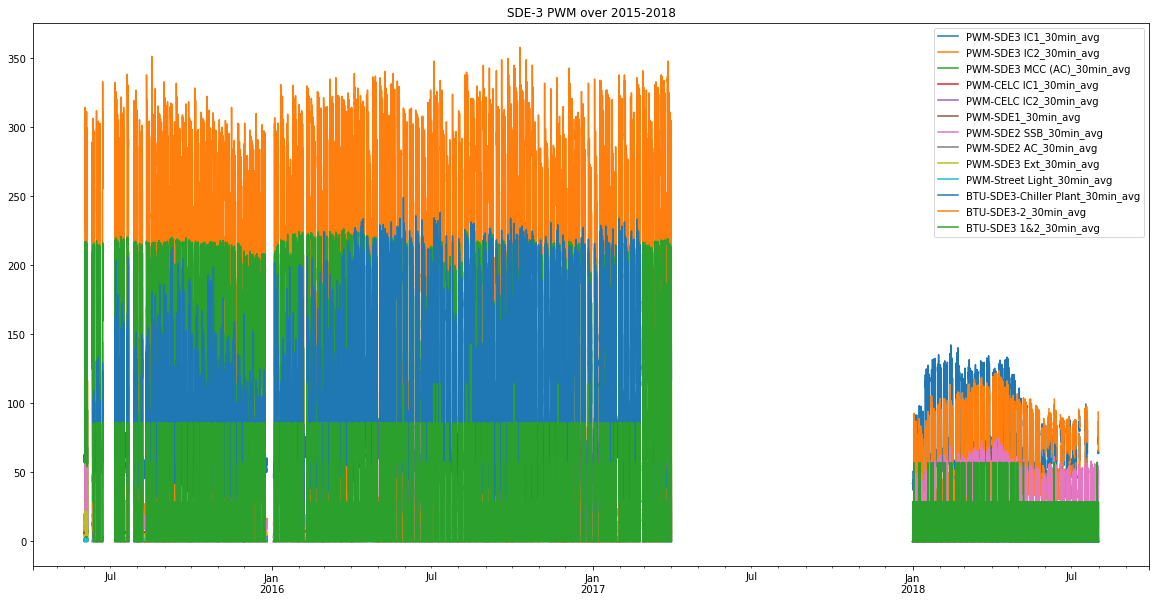

In [40]:
sde3_df.loc[:, sde3_df.columns.str.contains('30min')].plot(figsize=(20, 10), title='SDE-3 PWM over 2015-2018')

In [41]:
sde3_df.loc['2015-06-10 08H':'2015-06-10 23H', 'PWM-SDE3 IC1_30min_avg'][:10]

2015-06-10 08:00:00      NaN
2015-06-10 08:30:00      NaN
2015-06-10 09:00:00      NaN
2015-06-10 09:30:00      NaN
2015-06-10 10:00:00      NaN
2015-06-10 10:30:00      NaN
2015-06-10 11:00:00    126.5
2015-06-10 11:30:00    129.0
2015-06-10 12:00:00    129.0
2015-06-10 12:30:00    128.0
Freq: 30T, Name: PWM-SDE3 IC1_30min_avg, dtype: float64

(23898120, 23899620)

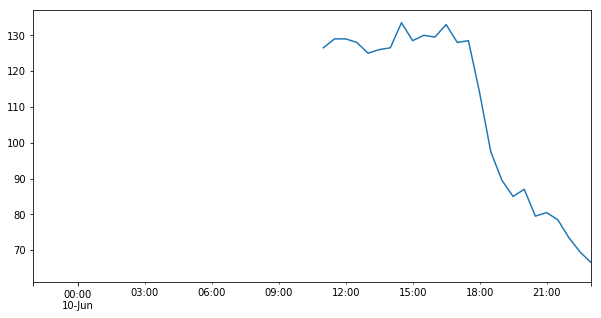

In [42]:
ax = sde3_df.loc['2015-06-09 22H':'2015-06-10 23H', 'PWM-SDE3 IC1_30min_avg'].plot(figsize=(10, 5))
ax.set_xlim(pd.Timestamp('2015-06-09 22H'), pd.Timestamp('2015-06-10 23H'))

In [43]:
sde3_PWM30_columns = []
for i in sde3_df.columns:
    if ('PWM' in i) & ('30' in i):
        sde3_PWM30_columns.append(i)
sde3_PWM30_columns

['PWM-SDE3 IC1_30min_avg',
 'PWM-SDE3 IC2_30min_avg',
 'PWM-SDE3 MCC (AC)_30min_avg',
 'PWM-CELC IC1_30min_avg',
 'PWM-CELC IC2_30min_avg',
 'PWM-SDE1_30min_avg',
 'PWM-SDE2 SSB_30min_avg',
 'PWM-SDE2 AC_30min_avg',
 'PWM-SDE3 Ext_30min_avg',
 'PWM-Street Light_30min_avg']

## Explore Daily Patterns

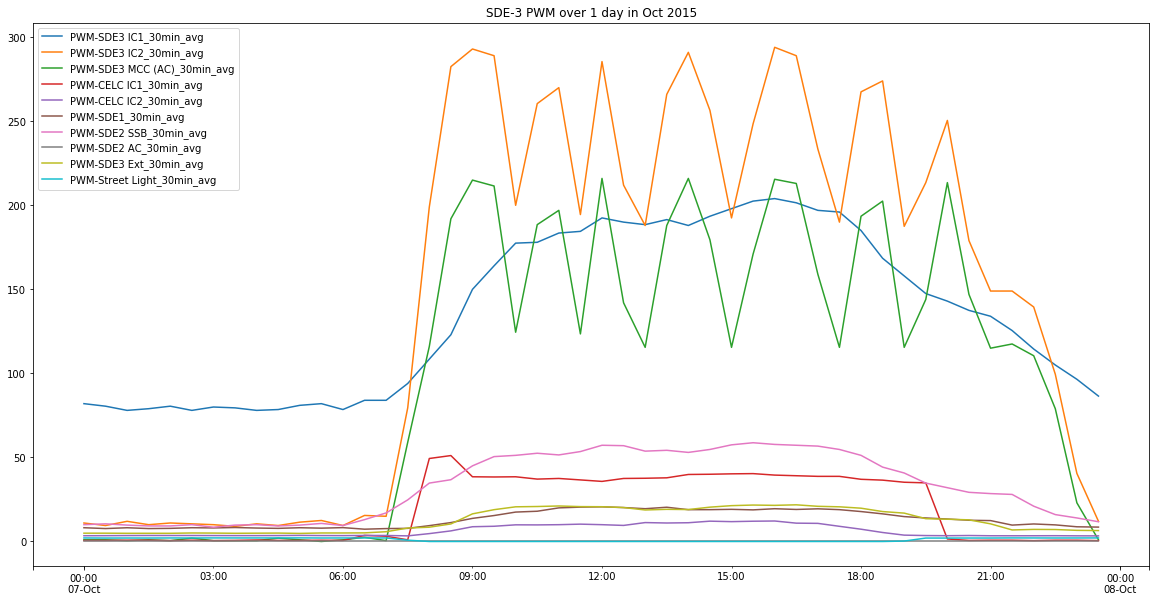

In [44]:
# Explore 1 day (7 Oct) in period before the data outage.
sde3_df.loc['2015-10-07 00H':'2015-10-07 23H', sde3_PWM30_columns].plot(figsize=(20, 10), title='SDE-3 PWM over 1 day in Oct 2015')

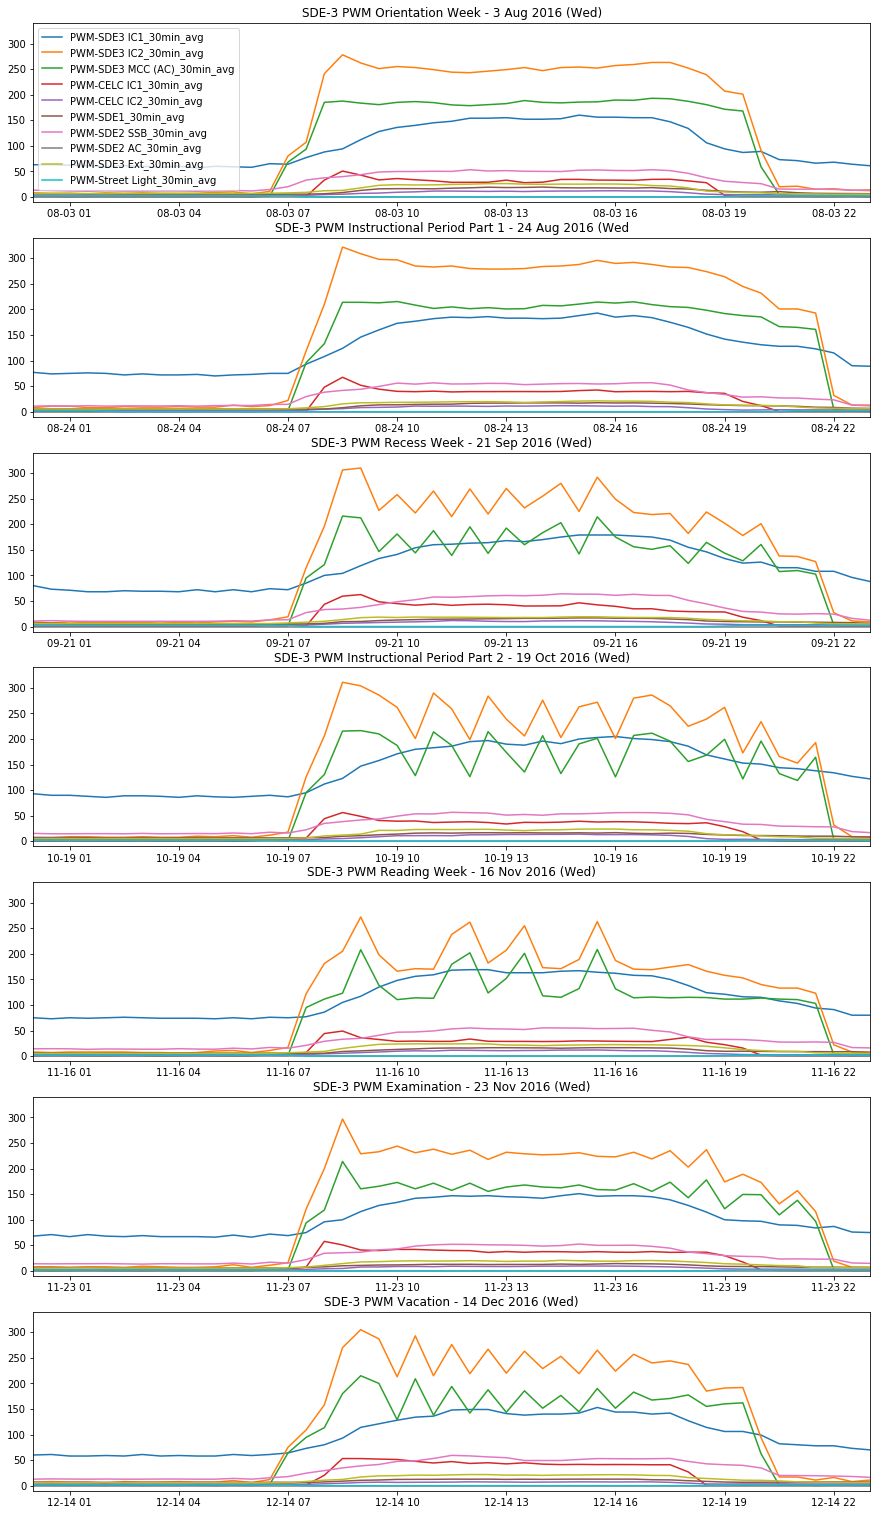

In [82]:
# Plot a day for each period in the academic calendar 2016 (before data outage).
plt.figure(figsize=(15, 27))
plt.subplot(711)
plt.plot(sde3_df.loc['2016-08-03 00H':'2016-08-03 23H', sde3_PWM30_columns])
plt.title('SDE-3 PWM Orientation Week - 3 Aug 2016 (Wed)')
plt.legend(sde3_PWM30_columns, loc='upper left')
plt.axis(['2016-08-03 00H', '2016-08-03 23H', -10, 340])
plt.subplot(712)
plt.plot(sde3_df.loc['2016-08-24 00H':'2016-08-24 23H', sde3_PWM30_columns])
plt.title('SDE-3 PWM Instructional Period Part 1 - 24 Aug 2016 (Wed')
plt.axis(['2016-08-24 00H', '2016-08-24 23H', -10, 340])
plt.subplot(713)
plt.plot(sde3_df.loc['2016-09-21 00H':'2016-09-21 23H', sde3_PWM30_columns])
plt.title('SDE-3 PWM Recess Week - 21 Sep 2016 (Wed)')
plt.axis(['2016-09-21 00H', '2016-09-21 23H', -10, 340])
plt.subplot(714)
plt.plot(sde3_df.loc['2016-10-19 00H':'2016-10-19 23H', sde3_PWM30_columns])
plt.title('SDE-3 PWM Instructional Period Part 2 - 19 Oct 2016 (Wed)')
plt.axis(['2016-10-19 00H', '2016-10-19 23H', -10, 340])
plt.subplot(715)
plt.plot(sde3_df.loc['2016-11-16 00H':'2016-11-16 23H', sde3_PWM30_columns])
plt.title('SDE-3 PWM Reading Week - 16 Nov 2016 (Wed)')
plt.axis(['2016-11-16 00H', '2016-11-16 23H', -10, 340])
plt.subplot(716)
plt.plot(sde3_df.loc['2016-11-23 00H':'2016-11-23 23H', sde3_PWM30_columns])
plt.title('SDE-3 PWM Examination - 23 Nov 2016 (Wed)')
plt.axis(['2016-11-23 00H', '2016-11-23 23H', -10, 340])
plt.subplot(717)
plt.plot(sde3_df.loc['2016-12-14 00H':'2016-12-14 23H', sde3_PWM30_columns])
plt.title('SDE-3 PWM Vacation - 14 Dec 2016 (Wed)')
plt.axis(['2016-12-14 00H', '2016-12-14 23H', -10, 340])
plt.show()

Observations :
* IC2 and MCC reduces from max to min at an earlier hour in the night during orientation and vacation
* Max value for IC2 is lower during orientation and reading week

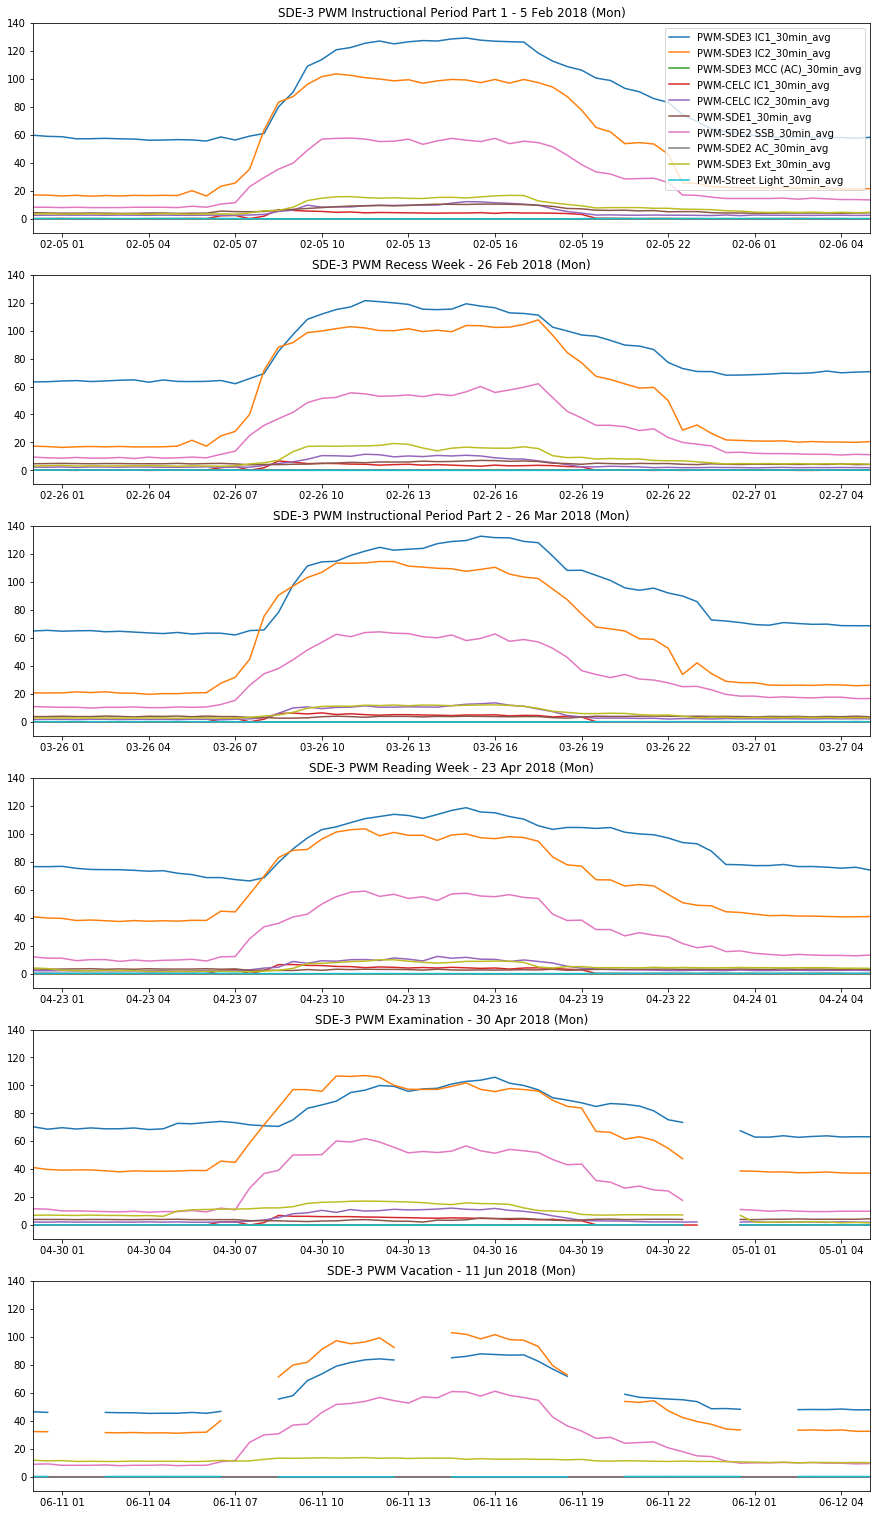

In [81]:
# Plot a day for each period in the academic calendar 2017/18 (after data outage).
plt.figure(figsize=(15, 27))
plt.subplot(611)
plt.plot(sde3_df.loc['2018-02-05 00H':'2018-02-06 05H', sde3_PWM30_columns])
plt.title('SDE-3 PWM Instructional Period Part 1 - 5 Feb 2018 (Mon)')
plt.legend(sde3_PWM30_columns, loc='upper right')
plt.axis(['2018-02-05 00H', '2018-02-06 05H', -10, 140])
plt.subplot(612)
plt.plot(sde3_df.loc['2018-02-26 00H':'2018-02-27 05H', sde3_PWM30_columns])
plt.title('SDE-3 PWM Recess Week - 26 Feb 2018 (Mon)')
plt.axis(['2018-02-26 00H', '2018-02-27 05H', -10, 140])
plt.subplot(613)
plt.plot(sde3_df.loc['2018-03-26 00H':'2018-03-27 05H', sde3_PWM30_columns])
plt.title('SDE-3 PWM Instructional Period Part 2 - 26 Mar 2018 (Mon)')
plt.axis(['2018-03-26 00H', '2018-03-27 05H', -10, 140])
plt.subplot(614)
plt.plot(sde3_df.loc['2018-04-23 00H':'2018-04-24 05H', sde3_PWM30_columns])
plt.title('SDE-3 PWM Reading Week - 23 Apr 2018 (Mon)')
plt.axis(['2018-04-23 00H', '2018-04-24 05H', -10, 140])
plt.subplot(615)
plt.plot(sde3_df.loc['2018-04-30 00H':'2018-05-01 05H', sde3_PWM30_columns])
plt.title('SDE-3 PWM Examination - 30 Apr 2018 (Mon)')
plt.axis(['2018-04-30 00H', '2018-05-01 05H', -10, 140])
plt.subplot(616)
plt.plot(sde3_df.loc['2018-06-11 00H':'2018-06-12 05H', sde3_PWM30_columns])
plt.title('SDE-3 PWM Vacation - 11 Jun 2018 (Mon)')
plt.axis(['2018-06-11 00H', '2018-06-12 05H', -10, 140])
plt.show()

Observations :
* MCC is 0, different from pre-data outage period.
* IC2 max values are one-third of those in pre-data outage period (cumulative values before diff() are very different)

## Explore Weekly Patterns

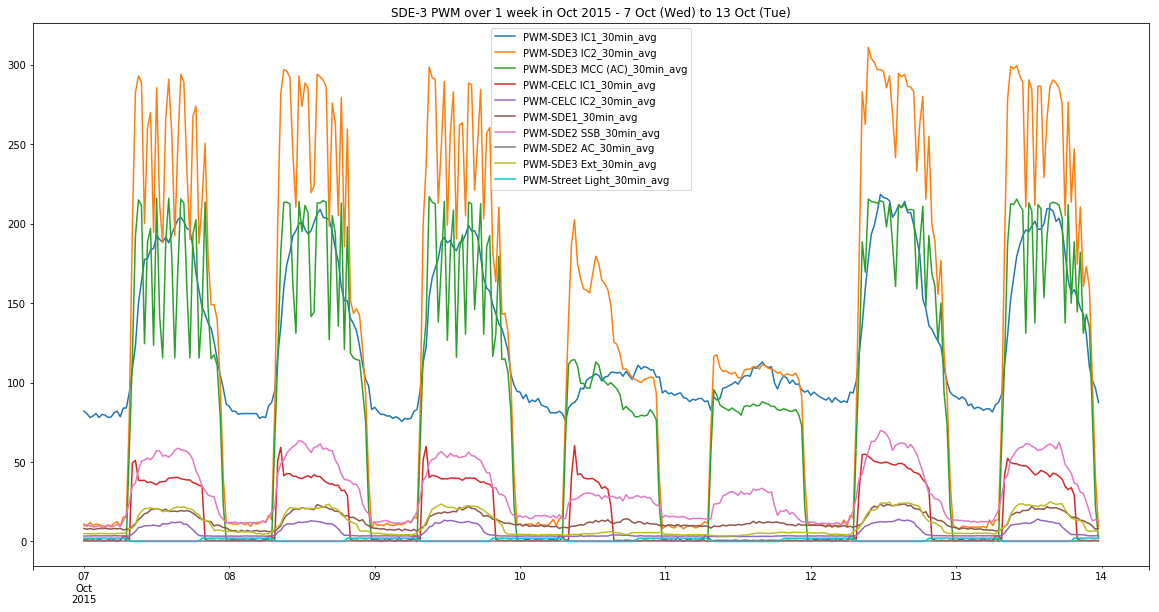

In [47]:
# Explore 1 week (7-13 Oct) during vacation time in the period before the data outage.
sde3_df.loc['2015-10-07 00H':'2015-10-13 23H', sde3_PWM30_columns].plot(figsize=(20, 10), title='SDE-3 PWM over 1 week in Oct 2015 - 7 Oct (Wed) to 13 Oct (Tue)')

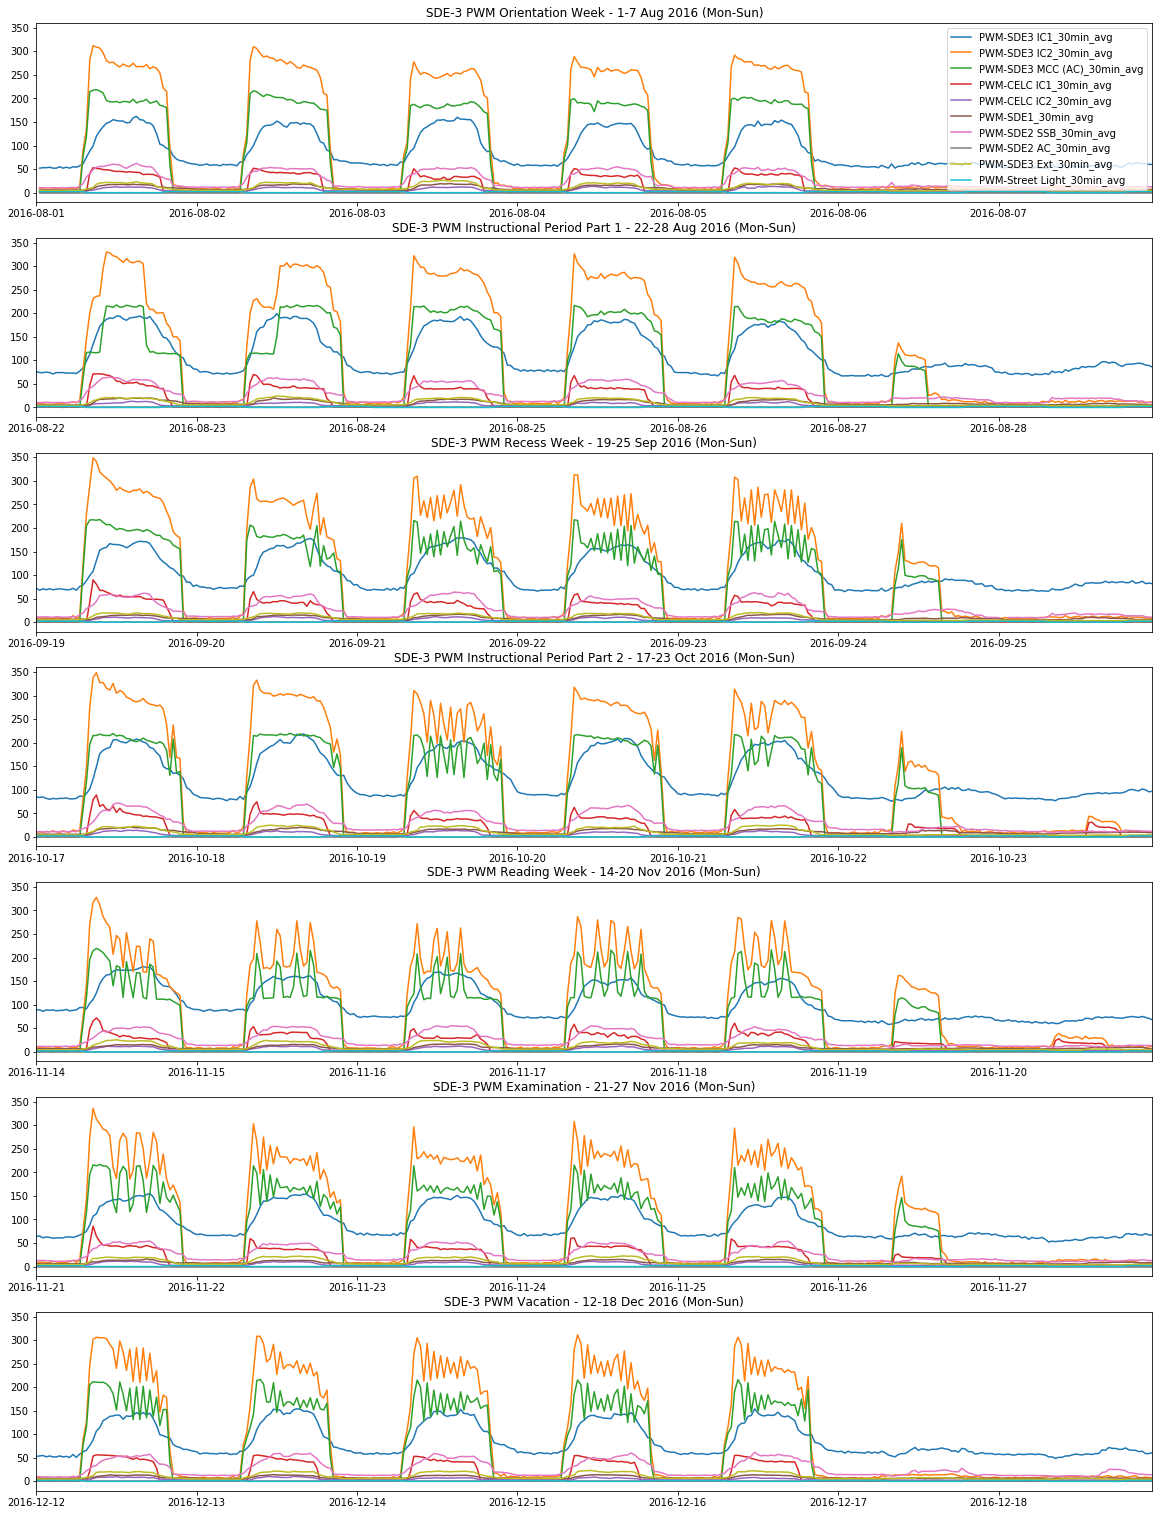

In [48]:
# Plot a week for each period in the academic calendar 2016.
plt.figure(figsize=(20, 27))
plt.subplot(711)
plt.plot(sde3_df.loc['2016-08-01 00H':'2016-08-07 23H', sde3_PWM30_columns])
plt.title('SDE-3 PWM Orientation Week - 1-7 Aug 2016 (Mon-Sun)')
plt.legend(sde3_PWM30_columns, loc='upper right')
plt.axis(['2016-08-01 00H', '2016-08-07 23H', -20, 360])
plt.subplot(712)
plt.plot(sde3_df.loc['2016-08-22 00H':'2016-08-28 23H', sde3_PWM30_columns])
plt.title('SDE-3 PWM Instructional Period Part 1 - 22-28 Aug 2016 (Mon-Sun)')
plt.axis(['2016-08-22 00H', '2016-08-28 23H', -20, 360])
plt.subplot(713)
plt.plot(sde3_df.loc['2016-09-19 00H':'2016-09-25 23H', sde3_PWM30_columns])
plt.title('SDE-3 PWM Recess Week - 19-25 Sep 2016 (Mon-Sun)')
plt.axis(['2016-09-19 00H', '2016-09-25 23H', -20, 360])
plt.subplot(714)
plt.plot(sde3_df.loc['2016-10-17 00H':'2016-10-23 23H', sde3_PWM30_columns])
plt.title('SDE-3 PWM Instructional Period Part 2 - 17-23 Oct 2016 (Mon-Sun)')
plt.axis(['2016-10-17 00H', '2016-10-23 23H', -20, 360])
plt.subplot(715)
plt.plot(sde3_df.loc['2016-11-14 00H':'2016-11-20 23H', sde3_PWM30_columns])
plt.title('SDE-3 PWM Reading Week - 14-20 Nov 2016 (Mon-Sun)')
plt.axis(['2016-11-14 00H', '2016-11-20 23H', -20, 360])
plt.subplot(716)
plt.plot(sde3_df.loc['2016-11-21 00H':'2016-11-27 23H', sde3_PWM30_columns])
plt.title('SDE-3 PWM Examination - 21-27 Nov 2016 (Mon-Sun)')
plt.axis(['2016-11-21 00H', '2016-11-27 23H', -20, 360])
plt.subplot(717)
plt.plot(sde3_df.loc['2016-12-12 00H':'2016-12-18 23H', sde3_PWM30_columns])
plt.title('SDE-3 PWM Vacation - 12-18 Dec 2016 (Mon-Sun)')
plt.axis(['2016-12-12 00H', '2016-12-18 23H', -20, 360])
plt.show()

Observations :
* Sat and Sun patterns are different for some periods, e.g. Sat consumption is lower during orientation, vacation periods.

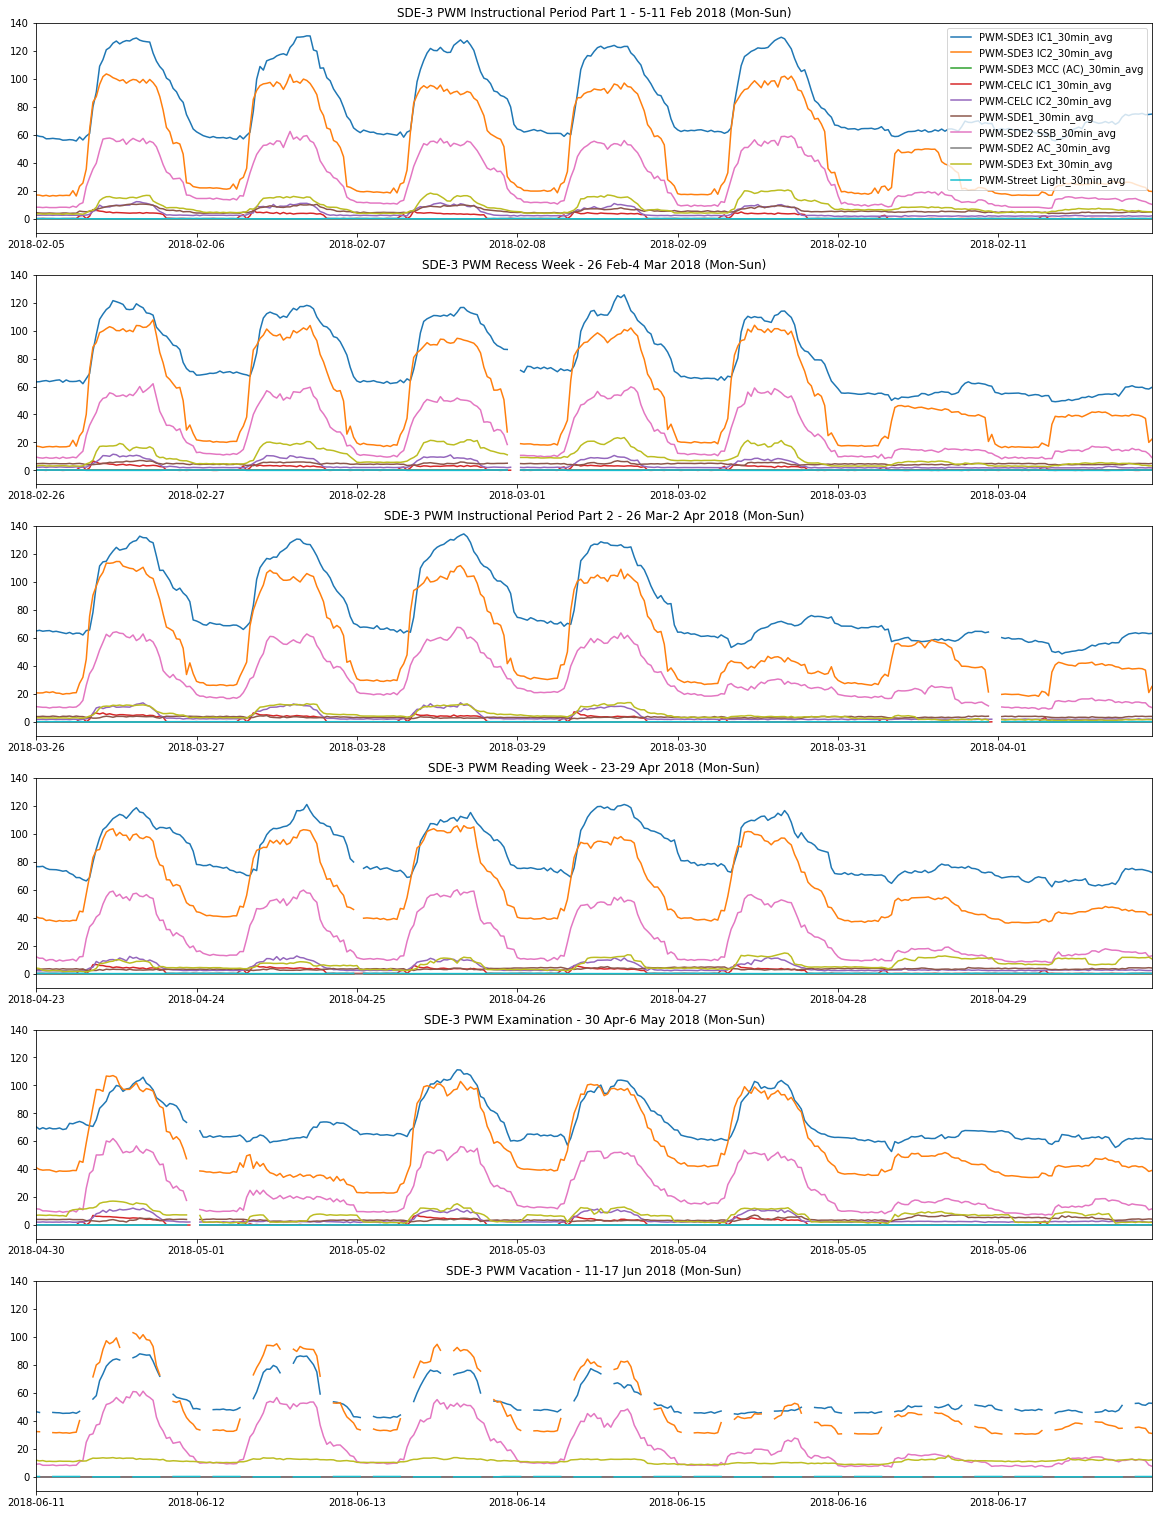

In [69]:
# Plot a week for each period in the academic calendar 2017/18
plt.figure(figsize=(20, 27))
plt.subplot(611)
plt.plot(sde3_df.loc['2018-02-05 00H':'2018-02-11 23H', sde3_PWM30_columns])
plt.title('SDE-3 PWM Instructional Period Part 1 - 5-11 Feb 2018 (Mon-Sun)')
plt.legend(sde3_PWM30_columns, loc='upper right')
plt.axis(['2018-02-05 00H', '2018-02-11 23H', -10, 140])
plt.subplot(612)
plt.plot(sde3_df.loc['2018-02-26 00H':'2018-03-04 23H', sde3_PWM30_columns])
plt.title('SDE-3 PWM Recess Week - 26 Feb-4 Mar 2018 (Mon-Sun)')
plt.axis(['2018-02-26 00H', '2018-03-04 23H', -10, 140])
plt.subplot(613)
plt.plot(sde3_df.loc['2018-03-26 00H':'2018-04-01 23H', sde3_PWM30_columns])
plt.title('SDE-3 PWM Instructional Period Part 2 - 26 Mar-2 Apr 2018 (Mon-Sun)')
plt.axis(['2018-03-26 00H', '2018-04-01 23H', -10, 140])
plt.subplot(614)
plt.plot(sde3_df.loc['2018-04-23 00H':'2018-04-29 23H', sde3_PWM30_columns])
plt.title('SDE-3 PWM Reading Week - 23-29 Apr 2018 (Mon-Sun)')
plt.axis(['2018-04-23 00H', '2018-04-29 23H', -10, 140])
plt.subplot(615)
plt.plot(sde3_df.loc['2018-04-30 00H':'2018-05-06 23H', sde3_PWM30_columns])
plt.title('SDE-3 PWM Examination - 30 Apr-6 May 2018 (Mon-Sun)')
plt.axis(['2018-04-30 00H', '2018-05-06 23H', -10, 140])
plt.subplot(616)
plt.plot(sde3_df.loc['2018-06-11 00H':'2018-06-17 23H', sde3_PWM30_columns])
plt.title('SDE-3 PWM Vacation - 11-17 Jun 2018 (Mon-Sun)')
plt.axis(['2018-06-11 00H', '2018-06-17 23H', -10, 140])
plt.show()

Observations :
* The different patterns in some days are due to public holidays.
* Lower max value during exam and vacation period.

## Calculate the PWM according to the Formula for the Building

In [50]:
sde3_df['PWM_30min_avg'] = sde3_df['PWM-SDE3 IC1_30min_avg'] + sde3_df['PWM-SDE3 IC2_30min_avg'] -\
                           sde3_df.loc[:, ['PWM-SDE3 MCC (AC)_30min_avg', 'PWM-CELC IC1_30min_avg', 'PWM-CELC IC2_30min_avg',
                                  'PWM-SDE1_30min_avg', 'PWM-SDE2 SSB_30min_avg', 'PWM-SDE2 AC_30min_avg',
                                  'PWM-SDE3 Ext_30min_avg', 'PWM-Street Light_30min_avg']].sum(axis=1, skipna=False)
sde3_df.loc['2018-07-31 07H':'2018-07-31 12H', sde3_PWM30_columns[:6] + ['PWM_30min_avg']]


<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>PWM-SDE3 IC1_30min_avg</th>
      <th>PWM-SDE3 IC2_30min_avg</th>
      <th>PWM-SDE3 MCC (AC)_30min_avg</th>
      <th>PWM-CELC IC1_30min_avg</th>
      <th>PWM-CELC IC2_30min_avg</th>
      <th>PWM-SDE1_30min_avg</th>
      <th>PWM_30min_avg</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>2018-07-31 07:00:00</th>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>2.75</td>
      <td>2.57</td>
      <td>0.0</td>
      <td>-34.20</td>
    </tr>
    <tr>
      <th>2018-07-31 07:30:00</th>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.12</td>
      <td>2.50</td>
      <td>0.0</td>
      <td>-40.24</td>
    </tr>
    <tr>
      <th>2018-07-31 08:00:00</th>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>2.00</td>
      <td>4.50</td>
      <td>0.0</td>
      <td>-49.50</td>
    </tr>
    <tr>
      <th>2018-07-31 08:30:00</th>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>6.00</td>
      <td>5.68</td>
      <td>0.0</td>
      <td>-58.93</td>
    </tr>
    <tr>
      <th>2018-07-31 09:00:00</th>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>5.38</td>
      <td>7.94</td>
      <td>0.0</td>
      <td>-68.32</td>
    </tr>
    <tr>
      <th>2018-07-31 09:30:00</th>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>4.75</td>
      <td>8.50</td>
      <td>0.0</td>
      <td>-68.38</td>
    </tr>
    <tr>
      <th>2018-07-31 10:00:00</th>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>3.62</td>
      <td>8.75</td>
      <td>0.0</td>
      <td>-72.62</td>
    </tr>
    <tr>
      <th>2018-07-31 10:30:00</th>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>3.88</td>
      <td>9.56</td>
      <td>0.0</td>
      <td>-75.94</td>
    </tr>
    <tr>
      <th>2018-07-31 11:00:00</th>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>4.00</td>
      <td>11.38</td>
      <td>0.0</td>
      <td>-83.13</td>
    </tr>
    <tr>
      <th>2018-07-31 11:30:00</th>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>4.12</td>
      <td>10.19</td>
      <td>0.0</td>
      <td>-82.06</td>
    </tr>
    <tr>
      <th>2018-07-31 12:00:00</th>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>4.13</td>
      <td>9.87</td>
      <td>0.0</td>
      <td>-78.75</td>
    </tr>
    <tr>
      <th>2018-07-31 12:30:00</th>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>4.12</td>
      <td>10.75</td>
      <td>0.0</td>
      <td>-79.49</td>
    </tr>
  </tbody>
</table>
</div>

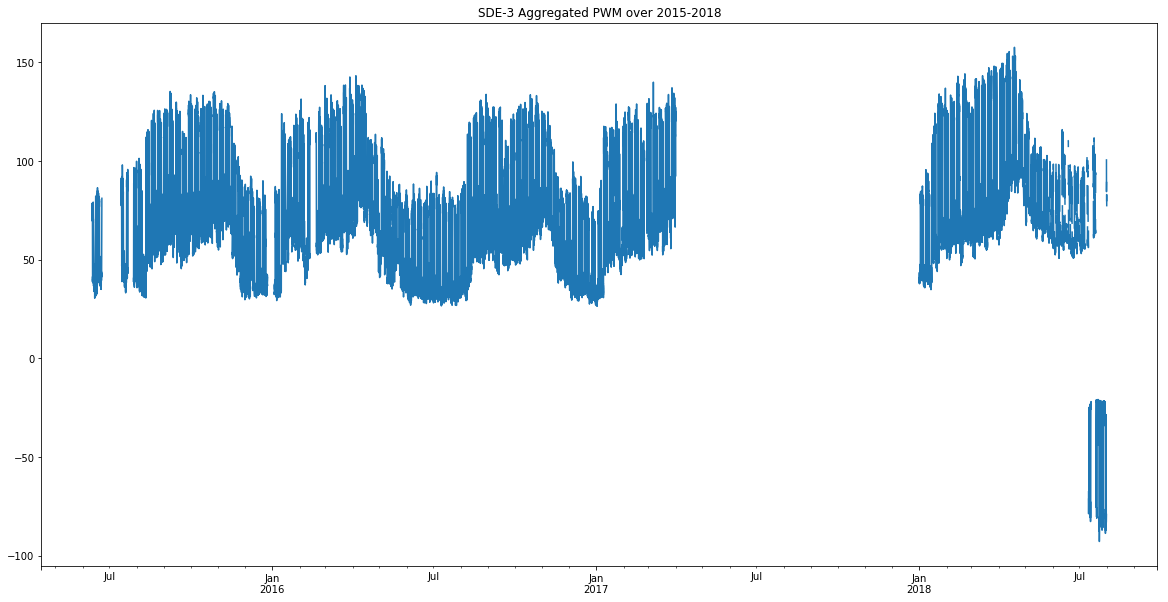

In [51]:
sde3_df['PWM_30min_avg'].plot(figsize=(20, 10), title='SDE-3 Aggregated PWM over 2015-2018')

## Explore Daily Patterns of the Aggregated PWM

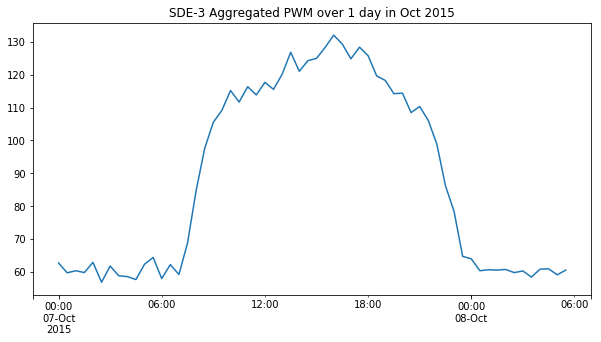

In [52]:
# Plot the aggregated PWM for 1 day before the period of data outage.
sde3_df.loc['2015-10-07 00H':'2015-10-08 05H', 'PWM_30min_avg'].plot(figsize=(10, 5), title='SDE-3 Aggregated PWM over 1 day in Oct 2015')

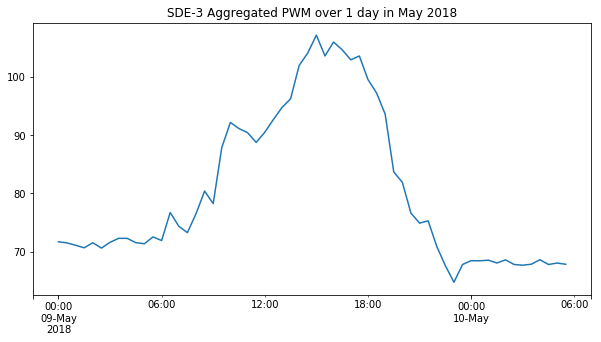

In [53]:
# Plot the aggregated PWM for 1 day after the period of data outage.
sde3_df.loc['2018-05-09 00H':'2018-05-10 05H', 'PWM_30min_avg'].plot(figsize=(10, 5), title='SDE-3 Aggregated PWM over 1 day in May 2018')

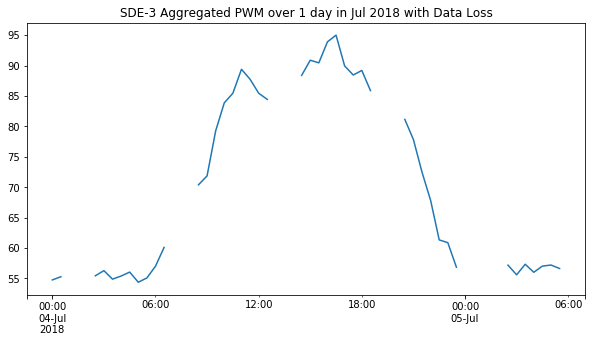

In [54]:
# Plot the aggregated PWM for 1 day after the period of data outage. In Jul 18, there is data loss.
sde3_df.loc['2018-07-04 00H':'2018-07-05 05H', 'PWM_30min_avg'].plot(figsize=(10, 5), title='SDE-3 Aggregated PWM over 1 day in Jul 2018 with Data Loss')

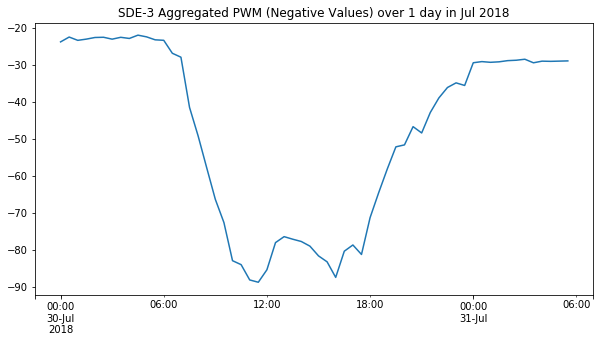

In [55]:
# Plot the aggregated PWM for 1 day after the period of data outage. This is a period when PWM-IC1 and IC2 have zero values which produces
# negative values for the aggregated PWM.
sde3_df.loc['2018-07-30 00H':'2018-07-31 05H', 'PWM_30min_avg'].plot(figsize=(10, 5), title='SDE-3 Aggregated PWM (Negative Values) over 1 day in Jul 2018')

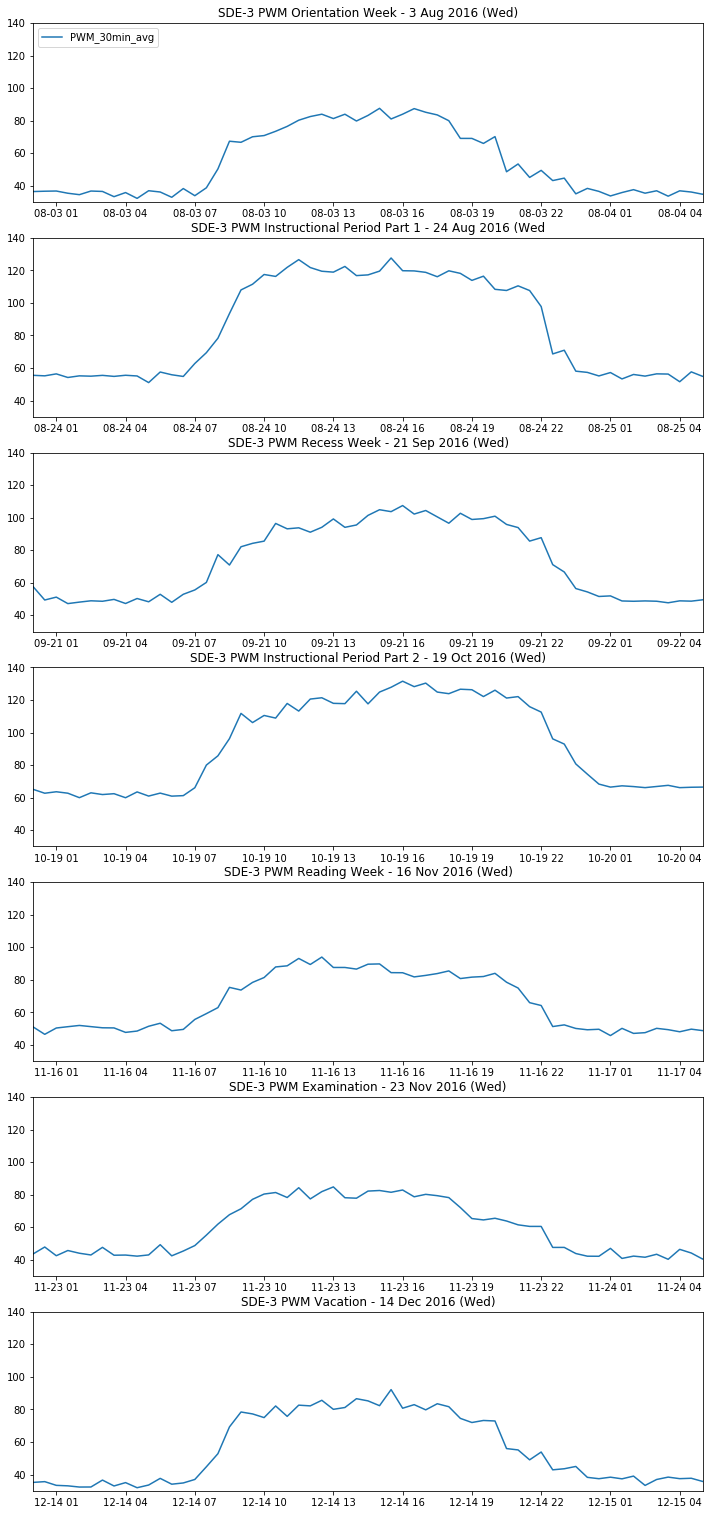

In [74]:
# Plot a day for each period in the academic calendar 2016 (before data outage).
plt.figure(figsize=(12, 27))
plt.subplot(711)
plt.plot(sde3_df.loc['2016-08-03 00H':'2016-08-04 05H', 'PWM_30min_avg'])
plt.title('SDE-3 PWM Orientation Week - 3 Aug 2016 (Wed)')
plt.axis(['2016-08-03 00H', '2016-08-04 05H', 30, 140])
plt.legend(loc='upper left')
plt.subplot(712)
plt.plot(sde3_df.loc['2016-08-24 00H':'2016-08-25 05H', 'PWM_30min_avg'])
plt.title('SDE-3 PWM Instructional Period Part 1 - 24 Aug 2016 (Wed')
plt.axis(['2016-08-24 00H', '2016-08-25 05H', 30, 140])
plt.subplot(713)
plt.plot(sde3_df.loc['2016-09-21 00H':'2016-09-22 05H', 'PWM_30min_avg'])
plt.title('SDE-3 PWM Recess Week - 21 Sep 2016 (Wed)')
plt.axis(['2016-09-21 00H', '2016-09-22 05H', 30, 140])
plt.subplot(714)
plt.plot(sde3_df.loc['2016-10-19 00H':'2016-10-20 05H', 'PWM_30min_avg'])
plt.title('SDE-3 PWM Instructional Period Part 2 - 19 Oct 2016 (Wed)')
plt.axis(['2016-10-19 00H', '2016-10-20 05H', 30, 140])
plt.subplot(715)
plt.plot(sde3_df.loc['2016-11-16 00H':'2016-11-17 05H', 'PWM_30min_avg'])
plt.title('SDE-3 PWM Reading Week - 16 Nov 2016 (Wed)')
plt.axis(['2016-11-16 00H', '2016-11-17 05H', 30, 140])
plt.subplot(716)
plt.plot(sde3_df.loc['2016-11-23 00H':'2016-11-24 05H', 'PWM_30min_avg'])
plt.title('SDE-3 PWM Examination - 23 Nov 2016 (Wed)')
plt.axis(['2016-11-23 00H', '2016-11-24 05H', 30, 140])
plt.subplot(717)
plt.plot(sde3_df.loc['2016-12-14 00H':'2016-12-15 05H', 'PWM_30min_avg'])
plt.title('SDE-3 PWM Vacation - 14 Dec 2016 (Wed)')
plt.axis(['2016-12-14 00H', '2016-12-15 05H', 30, 140])
plt.show()

Observations :
* Reduction in value in the night occurs earlier for orientation, reading, exam, vacation periods.
* Lower max values during orientation, reading, exam, vacation periods.

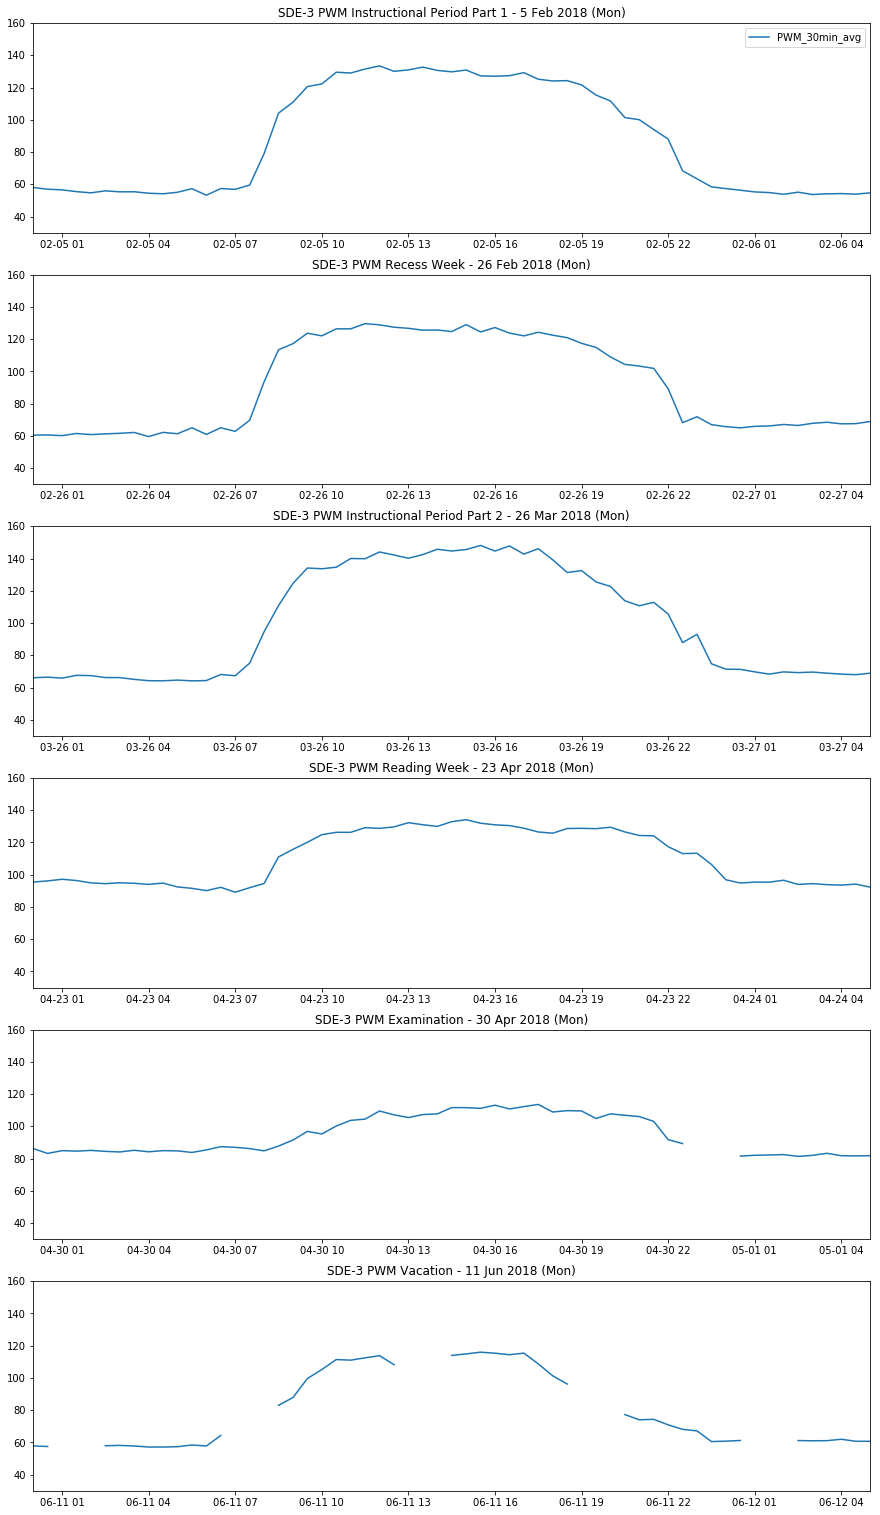

In [73]:
# Plot a day for each period in the academic calendar 2017/18 (after data outage).
plt.figure(figsize=(15, 27))
plt.subplot(611)
plt.plot(sde3_df.loc['2018-02-05 00H':'2018-02-06 05H', 'PWM_30min_avg'])
plt.title('SDE-3 PWM Instructional Period Part 1 - 5 Feb 2018 (Mon)')
plt.legend(loc='upper right')
plt.axis(['2018-02-05 00H', '2018-02-06 05H', 30, 160])
plt.subplot(612)
plt.plot(sde3_df.loc['2018-02-26 00H':'2018-02-27 05H', 'PWM_30min_avg'])
plt.title('SDE-3 PWM Recess Week - 26 Feb 2018 (Mon)')
plt.axis(['2018-02-26 00H', '2018-02-27 05H', 30, 160])
plt.subplot(613)
plt.plot(sde3_df.loc['2018-03-26 00H':'2018-03-27 05H', 'PWM_30min_avg'])
plt.title('SDE-3 PWM Instructional Period Part 2 - 26 Mar 2018 (Mon)')
plt.axis(['2018-03-26 00H', '2018-03-27 05H', 30, 160])
plt.subplot(614)
plt.plot(sde3_df.loc['2018-04-23 00H':'2018-04-24 05H', 'PWM_30min_avg'])
plt.title('SDE-3 PWM Reading Week - 23 Apr 2018 (Mon)')
plt.axis(['2018-04-23 00H', '2018-04-24 05H', 30, 160])
plt.subplot(615)
plt.plot(sde3_df.loc['2018-04-30 00H':'2018-05-01 05H', 'PWM_30min_avg'])
plt.title('SDE-3 PWM Examination - 30 Apr 2018 (Mon)')
plt.axis(['2018-04-30 00H', '2018-05-01 05H', 30, 160])
plt.subplot(616)
plt.plot(sde3_df.loc['2018-06-11 00H':'2018-06-12 05H', 'PWM_30min_avg'])
plt.title('SDE-3 PWM Vacation - 11 Jun 2018 (Mon)')
plt.axis(['2018-06-11 00H', '2018-06-12 05H', 30, 160])
plt.show()

Observations :
* Plateau region is smaller during vacation period.
* Lower max value during examination, vacation period.
* Higher max value compared to pre-data outage period.

## Explore Weekly Patterns of the Aggregated PWM

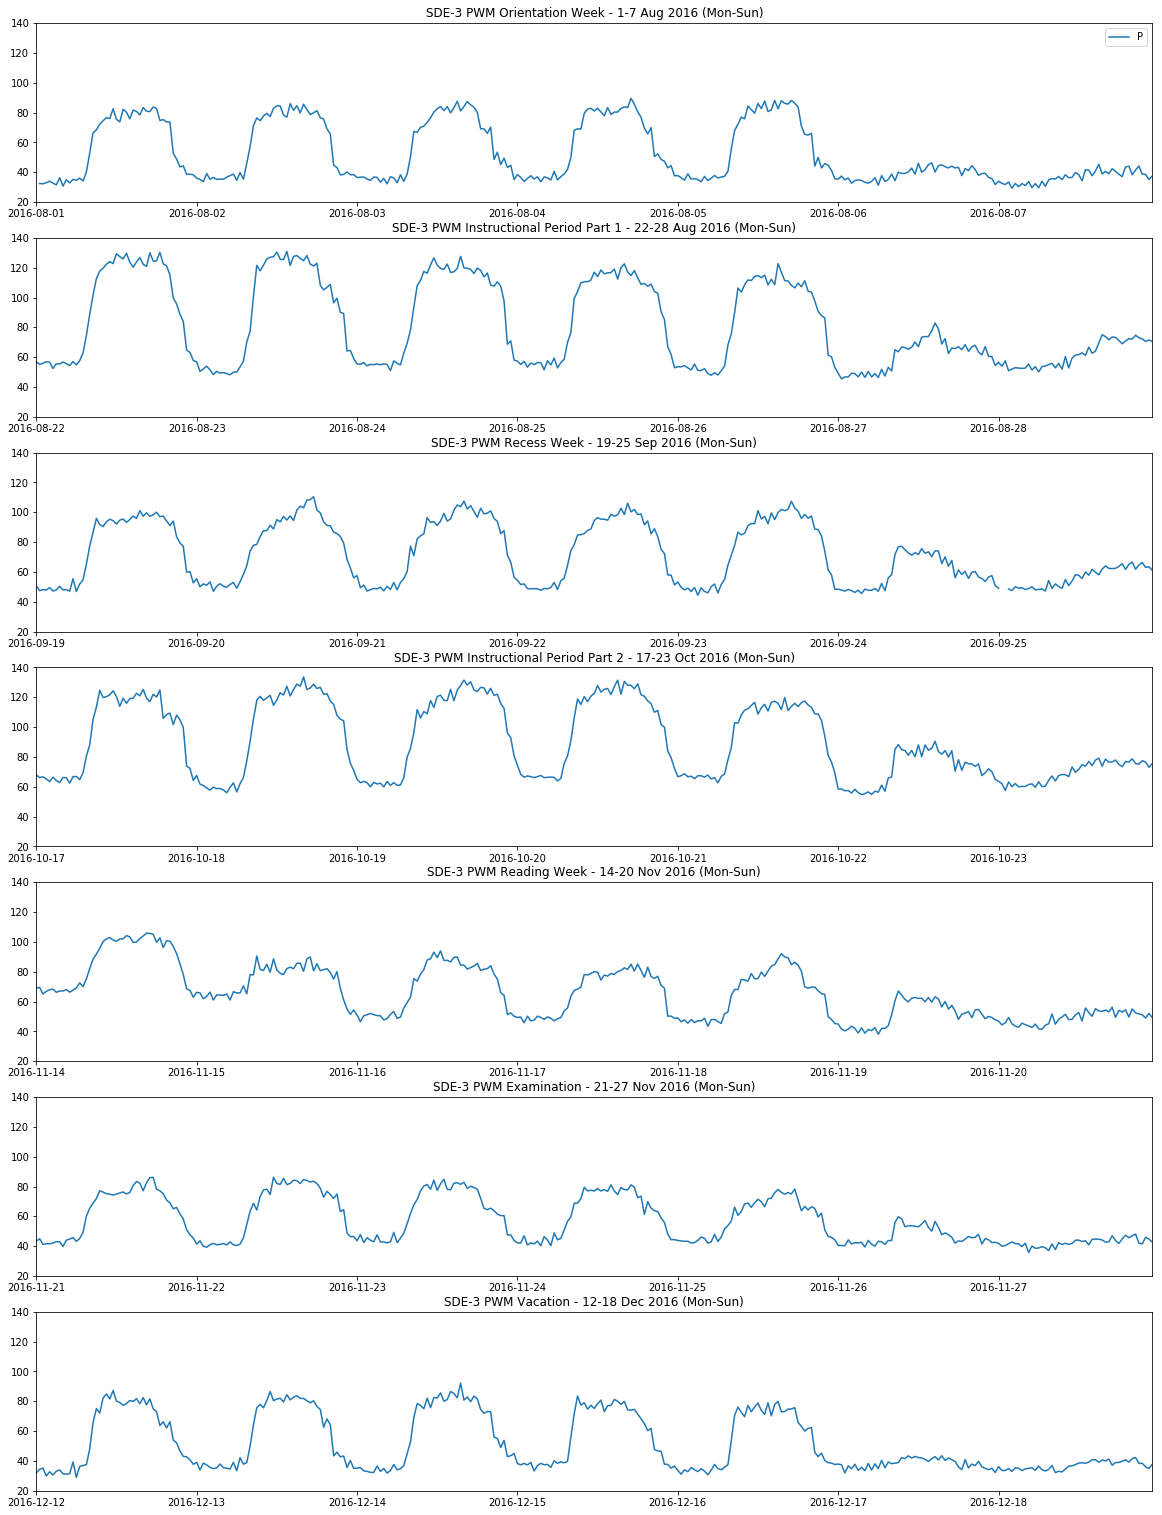

In [75]:
# Plot a week for each period in the academic calendar 2016 (before data outage).
plt.figure(figsize=(20, 27))
plt.subplot(711)
plt.plot(sde3_df.loc['2016-08-01 00H':'2016-08-07 23H', 'PWM_30min_avg'])
plt.title('SDE-3 PWM Orientation Week - 1-7 Aug 2016 (Mon-Sun)')
plt.legend('PWM_30min_avg', loc='upper right')
plt.axis(['2016-08-01 00H', '2016-08-07 23H', 20, 140])
plt.subplot(712)
plt.plot(sde3_df.loc['2016-08-22 00H':'2016-08-28 23H', 'PWM_30min_avg'])
plt.title('SDE-3 PWM Instructional Period Part 1 - 22-28 Aug 2016 (Mon-Sun)')
plt.axis(['2016-08-22 00H', '2016-08-28 23H', 20, 140])
plt.subplot(713)
plt.plot(sde3_df.loc['2016-09-19 00H':'2016-09-25 23H', 'PWM_30min_avg'])
plt.title('SDE-3 PWM Recess Week - 19-25 Sep 2016 (Mon-Sun)')
plt.axis(['2016-09-19 00H', '2016-09-25 23H', 20, 140])
plt.subplot(714)
plt.plot(sde3_df.loc['2016-10-17 00H':'2016-10-23 23H', 'PWM_30min_avg'])
plt.title('SDE-3 PWM Instructional Period Part 2 - 17-23 Oct 2016 (Mon-Sun)')
plt.axis(['2016-10-17 00H', '2016-10-23 23H', 20, 140])
plt.subplot(715)
plt.plot(sde3_df.loc['2016-11-14 00H':'2016-11-20 23H', 'PWM_30min_avg'])
plt.title('SDE-3 PWM Reading Week - 14-20 Nov 2016 (Mon-Sun)')
plt.axis(['2016-11-14 00H', '2016-11-20 23H', 20, 140])
plt.subplot(716)
plt.plot(sde3_df.loc['2016-11-21 00H':'2016-11-27 23H', 'PWM_30min_avg'])
plt.title('SDE-3 PWM Examination - 21-27 Nov 2016 (Mon-Sun)')
plt.axis(['2016-11-21 00H', '2016-11-27 23H', 20, 140])
plt.subplot(717)
plt.plot(sde3_df.loc['2016-12-12 00H':'2016-12-18 23H', 'PWM_30min_avg'])
plt.title('SDE-3 PWM Vacation - 12-18 Dec 2016 (Mon-Sun)')
plt.axis(['2016-12-12 00H', '2016-12-18 23H', 20, 140])
plt.show()

Observations :
* Max values are higher during instructional weeks.
* Sat consumption is lower during orientation, vacation periods.

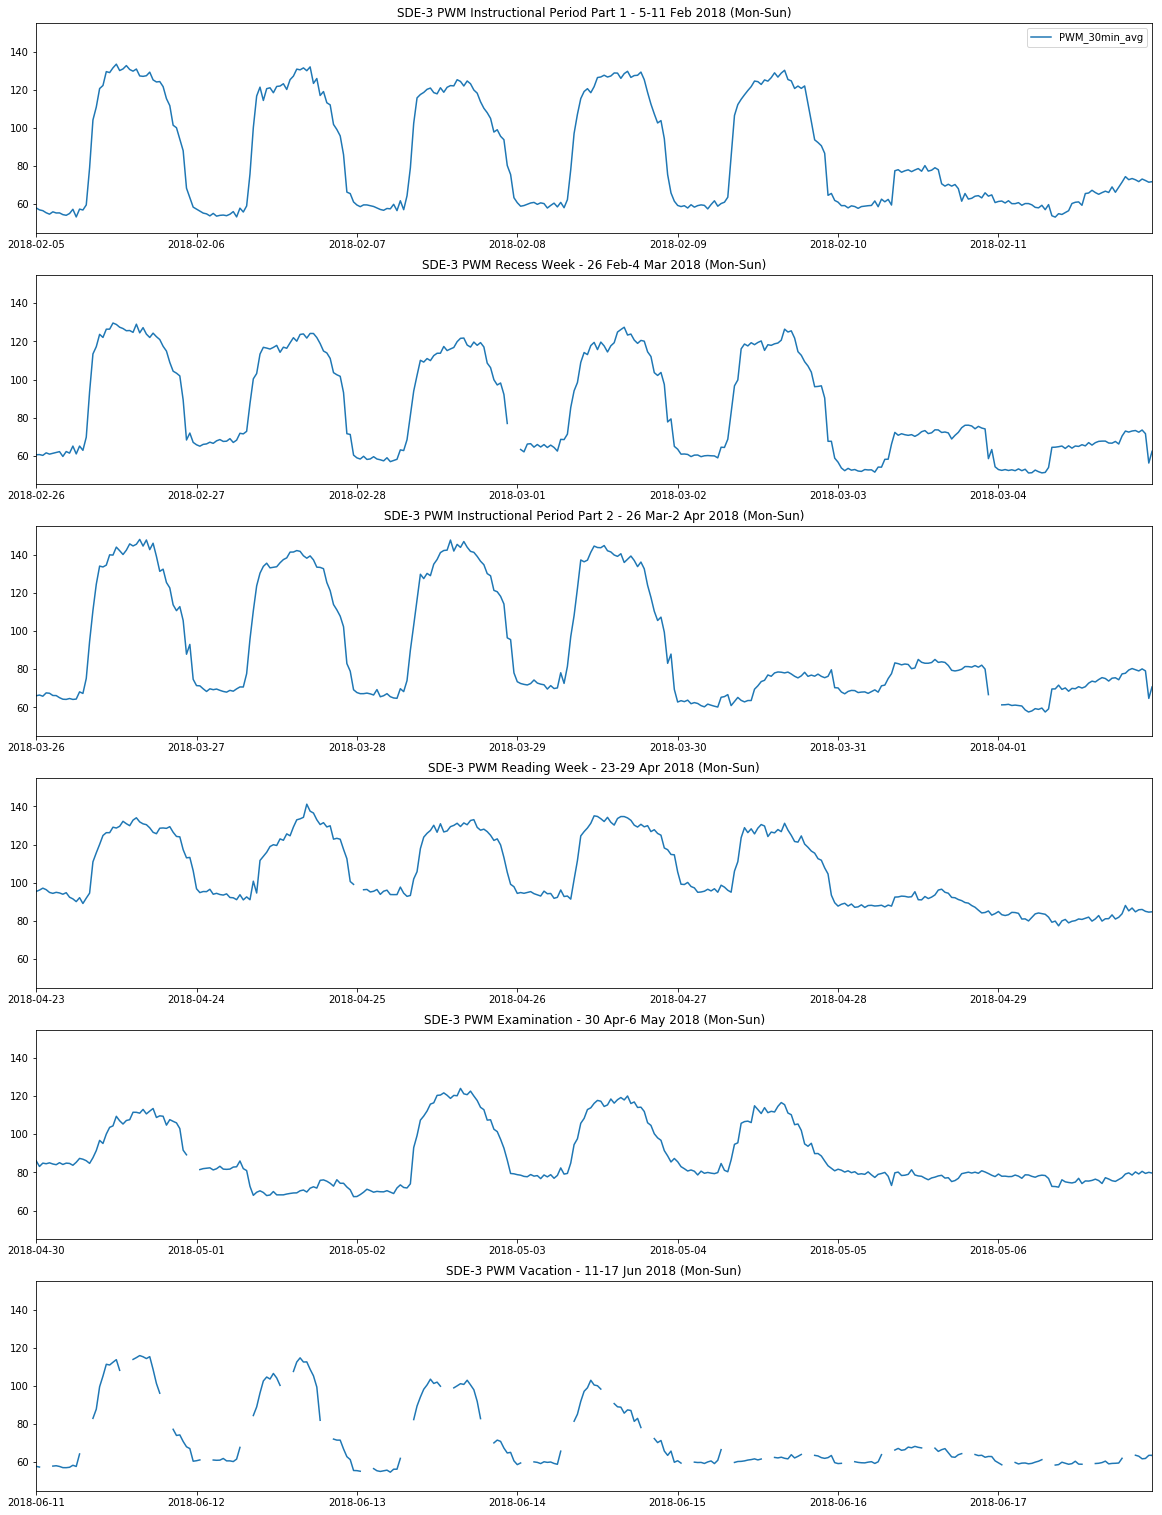

In [78]:
# Plot a week for each period in the academic calendar 2017/18 (after data outage)
plt.figure(figsize=(20, 27))
plt.subplot(611)
plt.plot(sde3_df.loc['2018-02-05 00H':'2018-02-11 23H', 'PWM_30min_avg'])
plt.title('SDE-3 PWM Instructional Period Part 1 - 5-11 Feb 2018 (Mon-Sun)')
plt.legend(loc='upper right')
plt.axis(['2018-02-05 00H', '2018-02-11 23H', 45, 155])
plt.subplot(612)
plt.plot(sde3_df.loc['2018-02-26 00H':'2018-03-04 23H', 'PWM_30min_avg'])
plt.title('SDE-3 PWM Recess Week - 26 Feb-4 Mar 2018 (Mon-Sun)')
plt.axis(['2018-02-26 00H', '2018-03-04 23H', 45, 155])
plt.subplot(613)
plt.plot(sde3_df.loc['2018-03-26 00H':'2018-04-01 23H', 'PWM_30min_avg'])
plt.title('SDE-3 PWM Instructional Period Part 2 - 26 Mar-2 Apr 2018 (Mon-Sun)')
plt.axis(['2018-03-26 00H', '2018-04-01 23H', 45, 155])
plt.subplot(614)
plt.plot(sde3_df.loc['2018-04-23 00H':'2018-04-29 23H', 'PWM_30min_avg'])
plt.title('SDE-3 PWM Reading Week - 23-29 Apr 2018 (Mon-Sun)')
plt.axis(['2018-04-23 00H', '2018-04-29 23H', 45, 155])
plt.subplot(615)
plt.plot(sde3_df.loc['2018-04-30 00H':'2018-05-06 23H', 'PWM_30min_avg'])
plt.title('SDE-3 PWM Examination - 30 Apr-6 May 2018 (Mon-Sun)')
plt.axis(['2018-04-30 00H', '2018-05-06 23H', 45, 155])
plt.subplot(616)
plt.plot(sde3_df.loc['2018-06-11 00H':'2018-06-17 23H', 'PWM_30min_avg'])
plt.title('SDE-3 PWM Vacation - 11-17 Jun 2018 (Mon-Sun)')
plt.axis(['2018-06-11 00H', '2018-06-17 23H', 45, 155])
plt.show()

Observations :
* Lower max value during vacation period.

## Plot the Aggregated PWM over Time (before data outage)

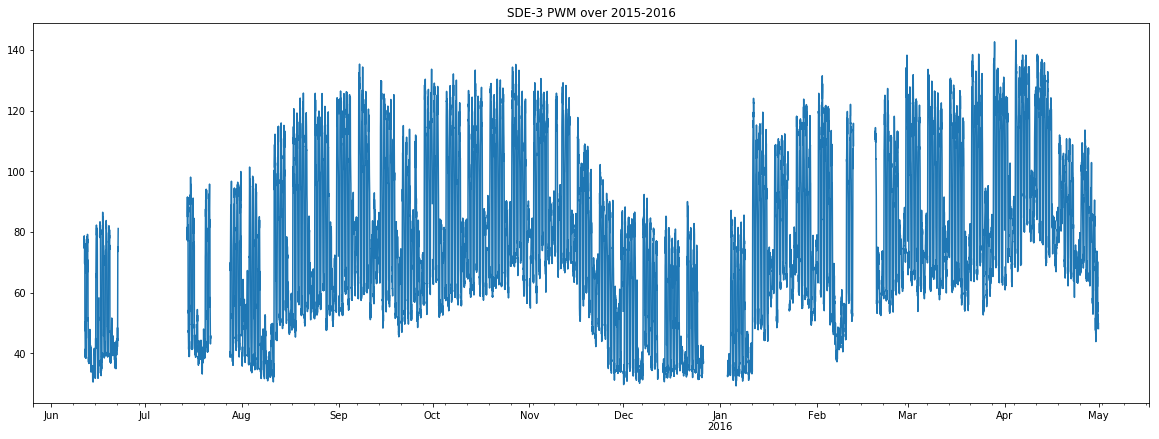

In [60]:
sde3_df.loc['2015-05-01 00H':'2016-04-30 23H', 'PWM_30min_avg'].plot(figsize=(20, 7), title='SDE-3 PWM over 2015-2016')

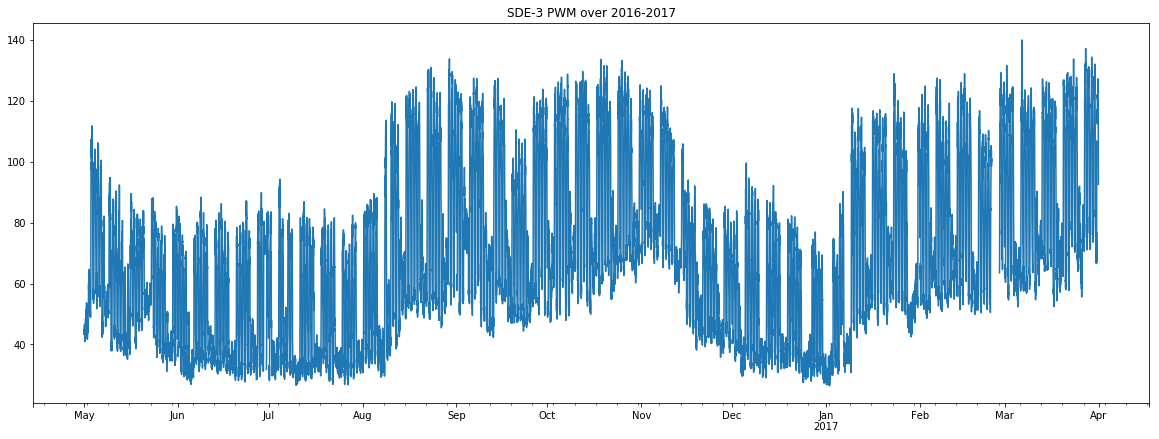

In [61]:
sde3_df.loc['2016-05-01 00H':'2017-03-31 23H', 'PWM_30min_avg'].plot(figsize=(20, 7), title='SDE-3 PWM over 2016-2017')

Let's use a moving average to smoothen the curve to better see the underlying pattern in the data.

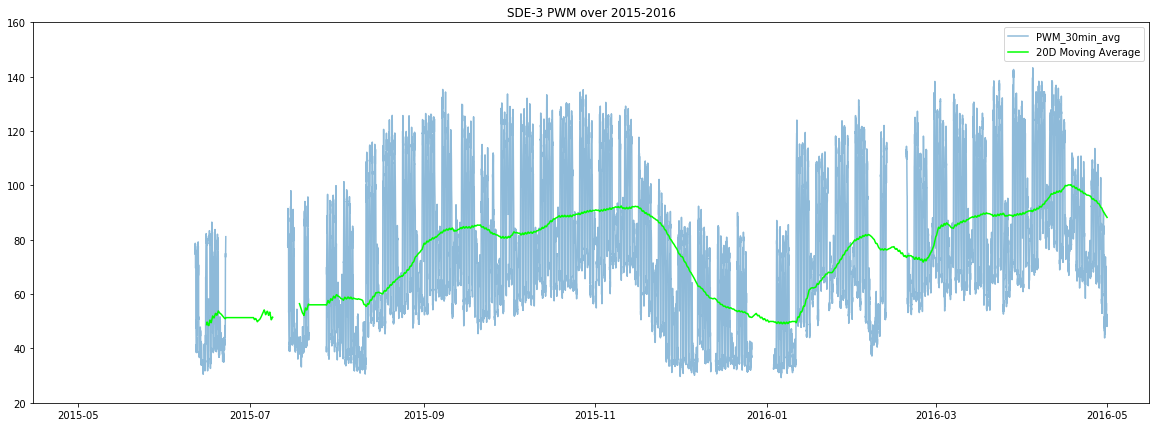

In [62]:
plt.figure(figsize=(20, 7))
plt.plot(sde3_df.loc['2015-05-01 00H':'2016-04-30 23H', 'PWM_30min_avg'], alpha=0.5)
plt.plot(sde3_df.loc['2015-05-01 00H':'2016-04-30 23H', 'PWM_30min_avg'].rolling(1000, min_periods=200).mean(), label='20D Moving Average', color='lime')
plt.axis(['2015-04-15 00H', '2016-05-15 23H', 20, 160])
plt.legend()
plt.title('SDE-3 PWM over 2015-2016')
plt.show()

Observations :
* The two plateaux in the curve correspond to the semester periods (3 Aug-5 Dec, 11 Jan-7 May)
* The valleys are the vacation periods (before 3 Aug, 6 Dec-10 Jan)
* The two mini-valleys correspond likely to the recess weeks (19-27 Sep, 20-28 Feb)

In [63]:
# Offset the 2015 moving average by a year for plotting with the 2016 data.
ma_2015_df = pd.DataFrame(sde3_df.loc['2015-05-01 00H':'2016-04-30 23H', 'PWM_30min_avg'].rolling(1000, min_periods=200).mean())
ma_2015_df.index = ma_2015_df.index + DateOffset(years=1)
ma_2015_df.head()

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>PWM_30min_avg</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>2016-05-01 00:00:00</th>
      <td>NaN</td>
    </tr>
    <tr>
      <th>2016-05-01 00:30:00</th>
      <td>NaN</td>
    </tr>
    <tr>
      <th>2016-05-01 01:00:00</th>
      <td>NaN</td>
    </tr>
    <tr>
      <th>2016-05-01 01:30:00</th>
      <td>NaN</td>
    </tr>
    <tr>
      <th>2016-05-01 02:00:00</th>
      <td>NaN</td>
    </tr>
  </tbody>
</table>
</div>

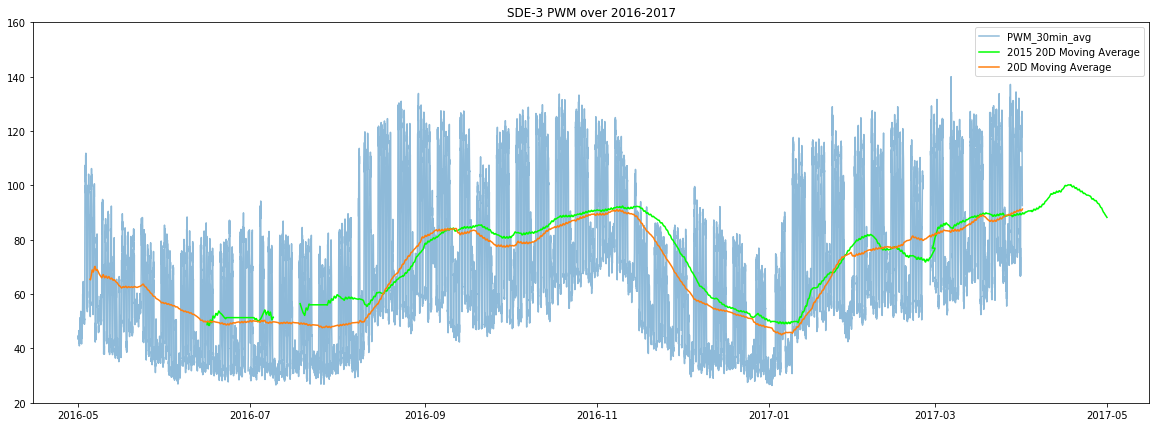

In [64]:
fig = plt.figure(figsize=(20, 7))
plt.plot(sde3_df.loc['2016-05-01 00H':'2017-03-31 23H', 'PWM_30min_avg'], alpha=0.5)
plt.plot(ma_2015_df, label='2015 20D Moving Average', color='lime')
plt.plot(sde3_df.loc['2016-05-01 00H':'2017-03-31 23H', 'PWM_30min_avg'].rolling(1000, min_periods=200).mean(), label='20D Moving Average')
plt.axis(['2016-04-15 00H', '2017-05-15 23H', 20, 160])
plt.legend()
plt.title('SDE-3 PWM over 2016-2017')
plt.show()

Observations :
* There patterns over the two years from 2015 to 2017 appear similar.
* There was no observed dip in the curve during recess week 18-26 Feb.

## Plot the Aggregated PWM over Time (after data outage)

In [65]:
# Offset the 2015/16 moving average by another year (i.e. for a total of 2 years) for plotting with the 2018 data.
ma_2015_df.index = ma_2015_df.index + DateOffset(years=1)
ma_2015_df.head()

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>PWM_30min_avg</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>2017-05-01 00:00:00</th>
      <td>NaN</td>
    </tr>
    <tr>
      <th>2017-05-01 00:30:00</th>
      <td>NaN</td>
    </tr>
    <tr>
      <th>2017-05-01 01:00:00</th>
      <td>NaN</td>
    </tr>
    <tr>
      <th>2017-05-01 01:30:00</th>
      <td>NaN</td>
    </tr>
    <tr>
      <th>2017-05-01 02:00:00</th>
      <td>NaN</td>
    </tr>
  </tbody>
</table>
</div>

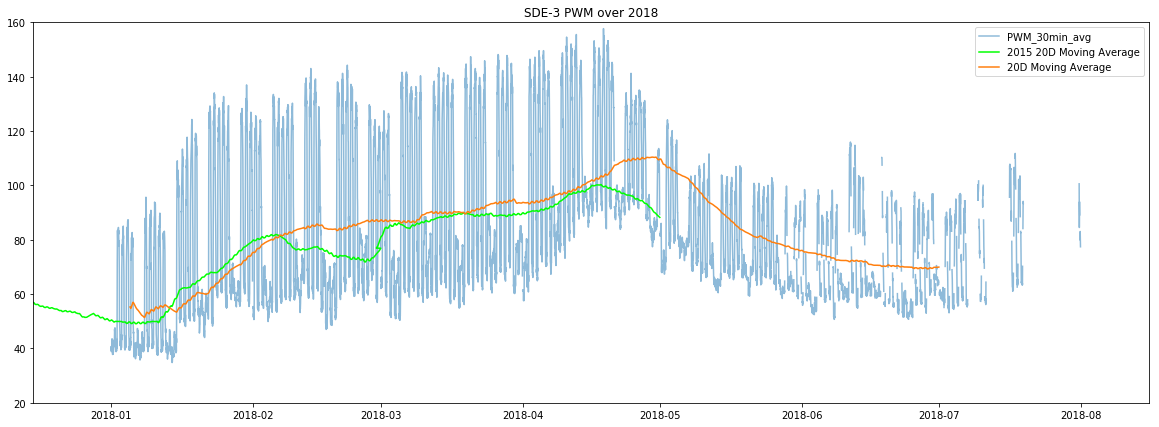

In [66]:
plt.figure(figsize=(20, 7))
plt.plot(sde3_df.loc['2018-01-01 00H':'2018-07-31 23H', 'PWM_30min_avg'], alpha=0.5)
plt.plot(ma_2015_df, label='2015 20D Moving Average', color='lime')
plt.plot(sde3_df.loc['2018-01-01 00H':'2018-06-30 23H', 'PWM_30min_avg'].rolling(1000, min_periods=200).mean(), label='20D Moving Average')
# plt.plot(sde3_df.loc['2018-01-01 00H':'2018-06-30 23H', 'PWM_30min_avg'].rolling(720, min_periods=100).mean(), label='15D Moving Average')
plt.axis(['2017-12-15 00H', '2018-08-15 23H', 20, 160])
plt.legend()
plt.title('SDE-3 PWM over 2018')
plt.show()

Observations :
* The max value is higher in 2018 than in 2016 (note that vacation period started on 8 May 16 and 13 May 18).

## Save to File for Further Data Exploration

In [67]:
# Reset the index so that Pt_timeStamp becoomes a regular column.
save_df = sde3_df.reset_index()
save_df.rename({'index':'Pt_timeStamp'}, axis='columns', inplace=True)
save_df.to_csv(os.path.join('source', 'test_data', 'SDE-3.agg.csv'), index=False)

In [68]:
save_df.iloc[:5, :5]

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Pt_timeStamp</th>
      <th>PWM-SDE3 IC1</th>
      <th>PWM-SDE3 IC2</th>
      <th>PWM-SDE3 MCC (AC)</th>
      <th>PWM-CELC IC1</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>2015-05-01 00:00:00</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>1</th>
      <td>2015-05-01 00:30:00</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>2</th>
      <td>2015-05-01 01:00:00</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>3</th>
      <td>2015-05-01 01:30:00</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>4</th>
      <td>2015-05-01 02:00:00</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
    </tr>
  </tbody>
</table>
</div>